In [1]:
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import koreanize_matplotlib

## EDA

In [2]:
file_name = glob('data/구내식당*/*')
file_name

['data\\구내식당_식수인원\\sample_submission.csv',
 'data\\구내식당_식수인원\\test.csv',
 'data\\구내식당_식수인원\\train.csv']

In [3]:
submission = pd.read_csv(file_name[0])
display(submission.shape)
submission.head()

(50, 3)

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0
3,2021-02-01,0,0
4,2021-02-02,0,0


In [4]:
test = pd.read_csv(file_name[1])
print(test.shape)
test.head(1)

(50, 10)


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치


In [5]:
train = pd.read_csv(file_name[2])
display(train.shape)
train.head(1)

(1205, 12)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0


### train, test 데이터셋 살펴보기

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              50 non-null     object 
 1   요일              50 non-null     object 
 2   본사정원수           50 non-null     int64  
 3   본사휴가자수          50 non-null     int64  
 4   본사출장자수          50 non-null     int64  
 5   본사시간외근무명령서승인건수  50 non-null     int64  
 6   현본사소속재택근무자수     50 non-null     float64
 7   조식메뉴            50 non-null     object 
 8   중식메뉴            50 non-null     object 
 9   석식메뉴            50 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.0+ KB


train 과 test 모두 <font color=pink>__Null값 X__</font>

In [8]:
train.describe()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,2807.815768,157.913693,241.142739,274.117012,43.506224,890.334440,461.772614
std,171.264404,144.190572,43.532298,246.239651,109.937400,209.505057,139.179202
min,2601.000000,23.000000,41.000000,0.000000,0.000000,296.000000,0.000000
25%,2645.000000,71.000000,217.000000,4.000000,0.000000,758.000000,406.000000
50%,2760.000000,105.000000,245.000000,299.000000,0.000000,879.000000,483.000000
75%,2962.000000,185.000000,272.000000,452.000000,0.000000,1032.000000,545.000000
max,3305.000000,1224.000000,378.000000,1044.000000,533.000000,1459.000000,905.000000


In [9]:
test.describe()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2956.840000,129.520000,209.220000,380.140000,298.140000
std,24.968846,84.065873,39.454593,346.564304,52.058056
min,2924.000000,50.000000,131.000000,0.000000,179.000000
25%,2924.000000,78.250000,176.500000,1.000000,257.250000
50%,2974.000000,95.000000,202.500000,465.500000,300.000000
75%,2975.000000,137.500000,245.250000,681.000000,333.250000
max,2983.000000,489.000000,279.000000,1003.000000,413.000000


describe로 수치형 데이터를 확인했을 때 float 형태 및 int64까지는 필요없을 것 같아보임  
> downcast 활용하여 <font color=pink>__unsigned__</font>타입으로 변경해주기

#### downcast

In [10]:
# downcast 

# train data
train_cols = train.columns.tolist()

for col in train_cols:
    if 'float' in str(train[col].dtypes) or 'int' in str(train[col].dtypes):
        train[col] = pd.to_numeric(train[col], downcast='unsigned')
        
# test data
test_cols = test.columns.tolist()

for col in test_cols:
    if 'float' in str(test[col].dtypes) or 'int' in str(test[col].dtypes):
        test[col] = pd.to_numeric(test[col], downcast='unsigned')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   일자              1205 non-null   object
 1   요일              1205 non-null   object
 2   본사정원수           1205 non-null   uint16
 3   본사휴가자수          1205 non-null   uint16
 4   본사출장자수          1205 non-null   uint16
 5   본사시간외근무명령서승인건수  1205 non-null   uint16
 6   현본사소속재택근무자수     1205 non-null   uint16
 7   조식메뉴            1205 non-null   object
 8   중식메뉴            1205 non-null   object
 9   석식메뉴            1205 non-null   object
 10  중식계             1205 non-null   uint16
 11  석식계             1205 non-null   uint16
dtypes: object(5), uint16(7)
memory usage: 63.7+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   일자              50 non-null     object
 1   요일              50 non-null     object
 2   본사정원수           50 non-null     uint16
 3   본사휴가자수          50 non-null     uint16
 4   본사출장자수          50 non-null     uint16
 5   본사시간외근무명령서승인건수  50 non-null     uint16
 6   현본사소속재택근무자수     50 non-null     uint16
 7   조식메뉴            50 non-null     object
 8   중식메뉴            50 non-null     object
 9   석식메뉴            50 non-null     object
dtypes: object(5), uint16(5)
memory usage: 2.6+ KB


In [13]:
train.describe()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,2807.815768,157.913693,241.142739,274.117012,43.506224,890.334440,461.772614
std,171.264404,144.190572,43.532298,246.239651,109.937400,209.505057,139.179202
min,2601.000000,23.000000,41.000000,0.000000,0.000000,296.000000,0.000000
25%,2645.000000,71.000000,217.000000,4.000000,0.000000,758.000000,406.000000
50%,2760.000000,105.000000,245.000000,299.000000,0.000000,879.000000,483.000000
75%,2962.000000,185.000000,272.000000,452.000000,0.000000,1032.000000,545.000000
max,3305.000000,1224.000000,378.000000,1044.000000,533.000000,1459.000000,905.000000


In [14]:
test.describe()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2956.840000,129.520000,209.220000,380.140000,298.140000
std,24.968846,84.065873,39.454593,346.564304,52.058056
min,2924.000000,50.000000,131.000000,0.000000,179.000000
25%,2924.000000,78.250000,176.500000,1.000000,257.250000
50%,2974.000000,95.000000,202.500000,465.500000,300.000000
75%,2975.000000,137.500000,245.250000,681.000000,333.250000
max,2983.000000,489.000000,279.000000,1003.000000,413.000000


describe 값들이 바뀌지 않았으므로 downcast가 문제없이 잘 진행됐음을 알 수 있음

#### 데이터 분포 확인

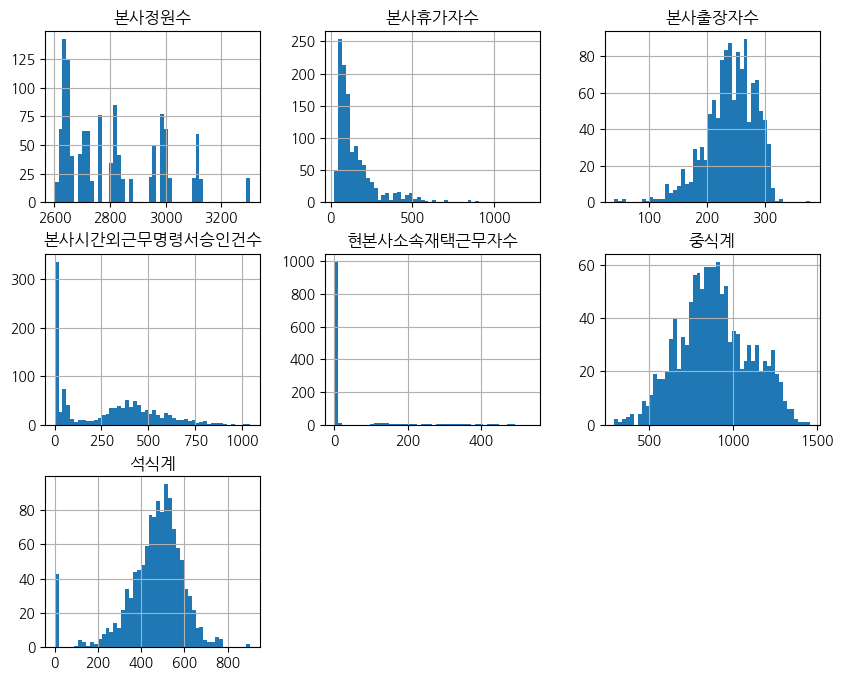

In [15]:
train.hist(bins=50, figsize=(10,8));

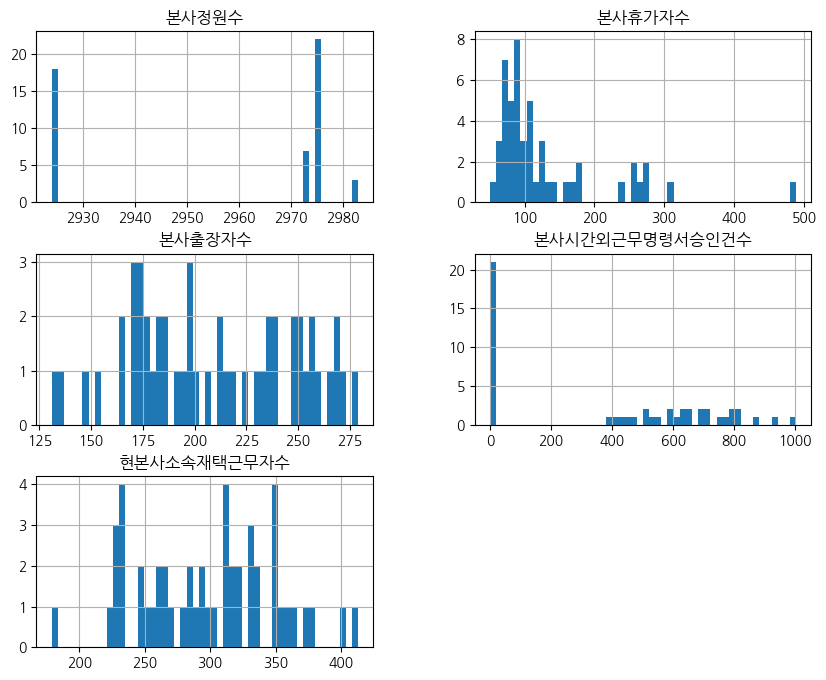

In [16]:
test.hist(bins=50, figsize=(10,8));

본사출장지수, 중식계, 석식계는 나름 정규분포를 형태를 띄는 것 같음

#### 상관계수 확인

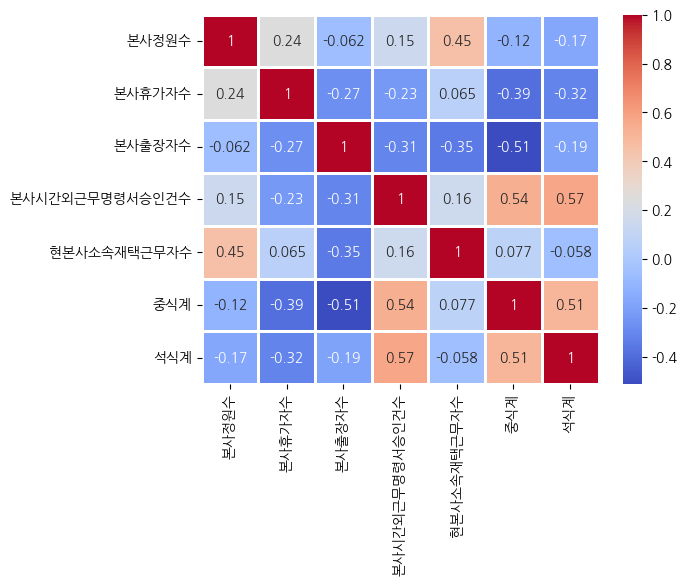

In [17]:
train_corr_matrix = train.corr()
sns.heatmap(train_corr_matrix, annot=True, linewidth=1, cmap='coolwarm');

#### 메뉴 전처리
***

In [18]:
train.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039,331
1,2016-02-02,화,2601,50,173,319,0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867,560


##### 메뉴 내에 있는 <font color=pink>__원산지 표시 및 (New) 없애주기__</font>

In [19]:
# 원산지 및 (New)없애주는 함수 만들기
def remove_detail(menu):
    pattern = r'\([^)]*\)' 
    menu = re.sub(pattern, '', menu)
    menu = menu.split()
    
    return menu

In [20]:
import re
train_preprocessed = train.copy()

train_preprocessed['조식메뉴'] = train['조식메뉴'].map(remove_detail)
train_preprocessed['중식메뉴'] = train['중식메뉴'].map(remove_detail)
train_preprocessed['석식메뉴'] = train['석식메뉴'].map(remove_detail)

train_preprocessed.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...","[쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]",1039,331
1,2016-02-02,화,2601,50,173,319,0,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...","[쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추...","[콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]",867,560


In [21]:
test['조식메뉴'] = train['조식메뉴'].map(remove_detail)
test['중식메뉴'] = train['중식메뉴'].map(remove_detail)
test['석식메뉴'] = train['석식메뉴'].map(remove_detail)

test.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...","[쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]"
1,2021-01-28,목,2983,104,212,409,348,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...","[쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추...","[콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]"


#####  '조식메뉴'제거
* 조식메뉴는 조식계가 없는 한 쓸모없을 것 같다고 판단

In [22]:
train_preprocessed = train_preprocessed.drop(columns=['조식메뉴'])

display(train_preprocessed.head(3))
display(train_preprocessed.tail(3))
train_preprocessed.sample(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0,"[쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]",1039,331
1,2016-02-02,화,2601,50,173,319,0,"[쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추...","[콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]",867,560
2,2016-02-03,수,2601,56,180,111,0,"[카레덮밥, 팽이장국, 치킨핑거, 쫄면야채무침, 견과류조림, 요구르트, 포기김치]","[쌀밥/잡곡밥, 청국장찌개, 황태양념구이, 고기전, 새송이버섯볶음, 포기김치]",1017,573


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
1202,2021-01-22,금,2983,255,248,1,303,"[전주비빔밥*약고추장, 계란파국, 요거닭, 올방개묵무침, 파프리카해초무침, 포기김치...","[흑미밥, 수제비국, 수제맛쵸킹탕수육, 유부채소겨자냉채, 참나물무침, 갓김치/겉절이김치]",579,217
1203,2021-01-25,월,2983,107,153,616,327,"[쌀밥/흑미밥/찰현미밥, 전주식콩나물해장국, 돈육간장불고기, 깐풍연근, 연두부*달래...","[흑미밥, 열무된장국, 장어강정*데리야끼소스, 깻잎쌈*생강채, 오이선, 포기김치]",1145,502
1204,2021-01-26,화,2983,69,183,551,362,"[쌀밥/귀리밥/찰현미밥, 들깨미역국, 교촌간장치킨, 옥수수콘치즈구이, 가지고추장무침...","[할라피뇨멸치주먹밥, 잔치국수, 수제고기육전, 쑥갓나물, 양파초절임, 깍두기]",1015,480


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
106,2016-07-08,금,2643,155,260,60,0,"[쌀밥/잡곡밥, 우무묵냉국, 갈릭돈까스, 감자볶음, 영양부추, 알타리김치]","[쌀밥/잡곡밥, 알탕, 고추잡채*꽃빵, 동그랑땡전, 김구이, 포기김치]",863,534
676,2018-11-13,화,2815,91,280,328,0,"[쌀밥/잡곡밥, 청국장찌개, 돈육강정, 두부양념조림, 유채나물, 포기김치]","[통새우김밥, 미니짬뽕, 고구마그라탕, 키위드레싱샐러드, 단무지무침, 포기김치]",783,468
496,2018-02-06,화,2707,50,235,491,0,"[쌀밥/잡곡밥, 해물된장찌개, 쇠고기장조림, 참치야채전, 콩나물무침, 알타리김치]","[낙지볶음덮밥, 팽이장국, 야채튀김, 양배추샐러드, 조각사과, 포기김치]",1085,601


In [23]:
test = test.drop(columns=['조식메뉴'])

display(test.head(3))
display(test.tail(3))
test.sample(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358,"[쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]"
1,2021-01-28,목,2983,104,212,409,348,"[쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추...","[콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]"
2,2021-01-29,금,2983,270,249,0,294,"[카레덮밥, 팽이장국, 치킨핑거, 쫄면야채무침, 견과류조림, 요구르트, 포기김치]","[쌀밥/잡곡밥, 청국장찌개, 황태양념구이, 고기전, 새송이버섯볶음, 포기김치]"


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴
47,2021-04-07,수,2973,96,214,1,334,"[쌀밥/잡곡밥, 부대찌개, 쇠고기단호박조림, 열무나물, 시금치나물, 포기김치]","[치킨마요덮밥, 유부주머니국, 떡볶이, 단무지무침, 오렌지, 포기김치]"
48,2021-04-08,목,2973,105,238,509,324,"[쌀밥/잡곡밥, 수제비국, 돈육굴소스볶음, 양배추쌈, 무생채, 포기김치]","[비빔밥, 팽이버섯장국, 새우또띠아, 견과류조림, 피크닉, 포기김치]"
49,2021-04-09,금,2973,259,268,0,229,"[쌀밥/잡곡밥, 냉이된장찌개, 닭데리야끼조림, 도라지초무침, 콩나물무침, 포기김치]","[쌀밥/잡곡밥, 들깨미역국, 수제돈가스, 감자범벅, 참나물생채, 포기김치/무피클]"


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴
19,2021-02-25,목,2924,91,252,585,235,"[쌀밥/잡곡밥, 근대된장국, 탕수육, 새송이버섯조림, 무생채, 요구르트, 포기김치]","[멸치주먹밥, 우동, 떡볶이, 군고구마, 단무지, 포기김치]"
39,2021-03-26,금,2975,311,266,0,229,"[쌀밥/잡곡밥, 매운콩나물국, 돈육굴소스볶음, 동태전, 봄동나물, 포기김치]","[주먹밥, 잔치국수, 또띠아피자, 과일샐러드, 오이피클, 포기김치]"
16,2021-02-22,월,2924,105,197,814,247,"[쌀밥/잡곡밥, 수제비국, 오징어볶음, 계란찜, 도라지초무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 닭개장, 삼치구이, 꽃맛살볶음, 청경채사과무침, 포기김치]"


##### 메뉴개수 확인 

In [24]:
# 중식/석식 메뉴 개수 구하기
Lunch_menus_num = []
Dinner_menus_num = []

for i in range(len(train_preprocessed)):
    Lunch_num = len(train_preprocessed['중식메뉴'][i])
    Dinner_num = len(train_preprocessed['석식메뉴'][i])
    
    Lunch_menus_num.append(Lunch_num)
    Dinner_menus_num.append(Dinner_num)

Lunch_menus_num = pd.Series(Lunch_menus_num)
Dinner_menus_num = pd.Series(Dinner_menus_num)

menu_num_df = pd.DataFrame()
menu_num_df['중식메뉴 개수'] = Lunch_menus_num
menu_num_df['석식메뉴 개수'] = Dinner_menus_num

print('중식메뉴 개수')
print(menu_num_df['중식메뉴 개수'].value_counts())
print('석식메뉴 개수')
print(menu_num_df['석식메뉴 개수'].value_counts())

중식메뉴 개수
6    1012
7     182
8       9
5       1
1       1
Name: 중식메뉴 개수, dtype: int64
석식메뉴 개수
6    1142
1      32
7      19
3       7
0       4
8       1
Name: 석식메뉴 개수, dtype: int64


In [25]:
# 중식/석식 메뉴 개수 구하기
Lunch_menus_num = []
Dinner_menus_num = []

for i in range(len(test)):
    Lunch_num = len(test['중식메뉴'][i])
    Dinner_num = len(test['석식메뉴'][i])
    
    Lunch_menus_num.append(Lunch_num)
    Dinner_menus_num.append(Dinner_num)

Lunch_menus_num = pd.Series(Lunch_menus_num)
Dinner_menus_num = pd.Series(Dinner_menus_num)

menu_num_df = pd.DataFrame()
menu_num_df['중식메뉴 개수'] = Lunch_menus_num
menu_num_df['석식메뉴 개수'] = Dinner_menus_num

print('중식메뉴 개수')
print(menu_num_df['중식메뉴 개수'].value_counts())
print('석식메뉴 개수')
print(menu_num_df['석식메뉴 개수'].value_counts())

중식메뉴 개수
6    31
7    19
Name: 중식메뉴 개수, dtype: int64
석식메뉴 개수
6    50
Name: 석식메뉴 개수, dtype: int64


메뉴 개수에 따른 형태도 같이 파악하기

* 중식메뉴 개수별 확인

In [26]:
# 중식메뉴 1개

num_1_bool = []

for i in range(len(train_preprocessed)):
    True_False = len(train_preprocessed['중식메뉴'][i])==1
    num_1_bool.append(True_False)
num_1_bool = pd.Series(num_1_bool)

train_preprocessed[num_1_bool]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
1003,2020-03-11,수,2950,74,197,0,23,[카레라이스],"[쌀밥/잡곡밥, 부대찌개, 등갈비오븐구이, 쫄면비빔만두, 키위그린샐러드, 포기김치]",967,487


In [27]:
# 중식메뉴 5개

num_5_bool = []

for i in range(len(train_preprocessed)):
    True_False = len(train_preprocessed['중식메뉴'][i])==5
    num_5_bool.append(True_False)
num_5_bool = pd.Series(num_5_bool)

train_preprocessed[num_5_bool]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
223,2016-12-27,화,2705,127,236,51,0,"[쌀밥/잡곡밥, 열무된장국, 닭갈비, 우엉잡채, 포기김치]","[해물굴소스볶음밥, 맑은국, 돈육강정, 흑임자시금치샐러드, 피클/아이스슈, 포기김치]",823,314


In [28]:
# 중식메뉴 6개

num_6_bool = []

for i in range(len(train_preprocessed)):
    True_False = len(train_preprocessed['중식메뉴'][i])==6
    num_6_bool.append(True_False)
num_6_bool = pd.Series(num_6_bool)

train_preprocessed[num_6_bool]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
18,2016-03-02,수,2624,127,182,261,0,"[쌀밥/잡곡밥, 쇠고기미역국, 주꾸미볶음, 맛살계란말이, 아삭고추무침, 포기김치]","[쌀밥/잡곡밥, 된장찌개, 버섯불고기, 콩나물겨자채, 양념깻잎지, 포기김치]",1127,631
20,2016-03-04,금,2624,83,247,79,0,"[쌀밥/잡곡밥, 부대찌개, 가자미튀김, 메추리알조림, 열무된장나물, 깍두기]","[쌀밥/잡곡밥, 오징어국, 미트볼조림, 옥수수전, 부추생채, 포기김치]",837,673
21,2016-03-07,월,2624,50,195,456,0,"[쌀밥/잡곡밥, 콩나물국, 닭갈비, 모둠묵*양념장, 톳두부무침, 포기김치]","[쌀밥/잡곡밥, 대구찌개, 돈육굴소스볶음, 감자채볶음, 물파래무침, 포기김치]",1326,625
22,2016-03-08,화,2624,47,212,426,0,"[쌀밥/잡곡밥, 차돌박이찌개, 고등어김치말이, 소세지구이, 풋마늘초무침, 깍두기]","[카레덮밥, 가쯔오장국, 수제고로케*케찹, 과일샐러드, 오복지, 포기김치]",1026,609
23,2016-03-09,수,2624,43,225,0,0,"[쌀밥/잡곡밥, 북어국, 돈육장조림, 홍어무침, 시금치나물, 포기김치]","[쌀밥/잡곡밥, 육개장, 생선까스*탈탈소스, 야채계란찜, 콩나물무침, 포기김치]",901,523
...,...,...,...,...,...,...,...,...,...,...,...
1060,2020-06-04,목,2956,71,284,403,208,"[쌀밥/잡곡밥, 육개장, 소고기장조림, 녹두전, 비름나물, 포기김치]","[쌀밥/잡곡밥, 감자국, 미트볼조림, 브로컬리오징어숙회, 부추오리엔탈무침, 포기김치]",657,353
1061,2020-06-05,금,2956,233,291,0,176,"[베이컨김치볶음밥, 냉모밀국수, 해물부추전, 야채고로케, 수박, 깍두기]","[쌀밥/잡곡밥, 오징어국, 매운닭찜, 도토리묵야채무침, 멸치볶음, 포기김치]",505,251
1063,2020-06-09,화,2956,68,253,519,177,"[쌀밥/잡곡밥, 시금치된장국, 닭볶음탕, 두부구이*양념장, 미역줄기볶음, 포기김치]","[삼겹살마늘볶음밥, 콩나물국, 미니돈까스, 양상추메추리알샐러드, 꽈배기도너츠/요구르...",823,449
1065,2020-06-11,목,2956,82,280,399,172,"[쌀밥/잡곡밥, 매운소고기국, 굴비구이, 토마토프리타타, 도라지오이무침, 배추겉절이]","[야채볶음밥, 초계국수, 코코넛새우튀김, 옥수수콘치즈, 음료, 포기김치]",682,439


In [29]:
# 중식메뉴 7개

num_7_bool = []

for i in range(len(train_preprocessed)):
    True_False = len(train_preprocessed['중식메뉴'][i])==7
    num_7_bool.append(True_False)
num_7_bool = pd.Series(num_7_bool)

train_preprocessed[num_7_bool]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0,"[쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]",1039,331
1,2016-02-02,화,2601,50,173,319,0,"[쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추...","[콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]",867,560
2,2016-02-03,수,2601,56,180,111,0,"[카레덮밥, 팽이장국, 치킨핑거, 쫄면야채무침, 견과류조림, 요구르트, 포기김치]","[쌀밥/잡곡밥, 청국장찌개, 황태양념구이, 고기전, 새송이버섯볶음, 포기김치]",1017,573
3,2016-02-04,목,2601,104,220,355,0,"[쌀밥/잡곡밥, 쇠고기무국, 주꾸미볶음, 부추전, 시금치나물, 요구르트, 포기김치]","[미니김밥*겨자장, 우동, 멕시칸샐러드, 군고구마, 무피클, 포기김치]",978,525
4,2016-02-05,금,2601,278,181,34,0,"[쌀밥/잡곡밥, 떡국, 돈육씨앗강정, 우엉잡채, 청경채무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 차돌박이찌개, 닭갈비, 감자소세지볶음, 콩나물무침, 포기김치]",925,330
...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391,"[쌀밥/흑미밥/찰현미밥, 아욱국, 수제함박스테이크, 견과류마카로니범벅, 생깻잎지, ...","[김치볶음밥, 미니쫄우동*맛살튀김, 브로콜리깨소스무침, 계란후라이, 고들빼기무침, ...",1093,421
1201,2021-01-21,목,2983,92,231,462,351,"[쌀밥/수수밥/찰현미밥, 냉이된장국, 동파육, 봄동전, 청경채/버섯숙회*초장, 무생...","[흑미밥, 쇠고기무국, 삼치양념구이, 비엔나채소볶음, 숙주나물당근무침, 포기김치]",832,353
1202,2021-01-22,금,2983,255,248,1,303,"[전주비빔밥*약고추장, 계란파국, 요거닭, 올방개묵무침, 파프리카해초무침, 포기김치...","[흑미밥, 수제비국, 수제맛쵸킹탕수육, 유부채소겨자냉채, 참나물무침, 갓김치/겉절이김치]",579,217
1203,2021-01-25,월,2983,107,153,616,327,"[쌀밥/흑미밥/찰현미밥, 전주식콩나물해장국, 돈육간장불고기, 깐풍연근, 연두부*달래...","[흑미밥, 열무된장국, 장어강정*데리야끼소스, 깻잎쌈*생강채, 오이선, 포기김치]",1145,502


In [30]:
# 중식메뉴 8개

num_8_bool = []

for i in range(len(train_preprocessed)):
    True_False = len(train_preprocessed['중식메뉴'][i])==8
    num_8_bool.append(True_False)
num_8_bool = pd.Series(num_8_bool)

train_preprocessed[num_8_bool]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
1027,2020-04-14,화,2962,200,176,274,485,"[쌀밥/잡곡밥, 홍초콩나물국, LA갈비구이, 주꾸미세비체샐러드, 새우튀김, 참나물땅...","[작은밥, 백종원의, 고추짜장, 맑은국, 칠리베이비크랩, 시금치흑임자샐러드, 단무지...",879,453
1031,2020-04-21,화,2962,126,171,700,450,"[쌀밥/잡곡밥, 멸치국수, 오향장육, 꼬막미나리초무침, 베리베리샐러드, 양배추,케일...","[쌀밥/잡곡밥, 두부미소된장국, 오리훈제마늘볶음, 무쌈깻잎, 코다리강정, 오이소박이...",911,542
1032,2020-04-22,수,2962,132,204,2,443,"[쌀밥/잡곡밥, 나주곰탕, 춘천닭갈비, 황태포무침, 단호박견과류구이, 가지나물무침,...","[쌀밥/잡곡밥, 굴미역국, 오삼불고기, 스팸,깻잎전, 쪽파김무침, 포기김치]",945,439
1033,2020-04-23,목,2962,107,251,518,437,"[쌀밥/잡곡밥, 새우완자탕, 고구마치즈돈까스, 해물볶음우동, 연어훈제샐러드, 두릅새...","[쌀밥/잡곡밥, 조갯살아욱국, 함박스테이크, 삼치데리야끼, 청포묵야채무침, 포기김치]",880,461
1034,2020-04-24,금,2962,232,267,1,387,"[쌀밥/잡곡밥, 대구지리탕, 카레닭볶음, 모듬소세지버섯구이, 그린샐러드, 문어오이미...","[쌀밥/잡곡밥, 나가사끼짬뽕국*라면, 순대야채볶음, 꼬치어묵떡볶이, 짜사이채무침, ...",639,309
1039,2020-05-06,수,2962,104,177,2,291,"[쌀밥/잡곡밥, 왕갈비탕, 해물전, 쫄면야채무침, 꼬시래기무초무침, 황도샐러드,포도...","[땡초주먹밥, 근대두부된장국, 치킨텐더, 루꼴라샐러드, 쫑상추새콤무침, 망고주스, ...",1254,495
1041,2020-05-08,금,2962,153,265,0,246,"[쌀밥/잡곡밥, 아욱수제비국, 해물섞어찜, 크레미계란말이, 통오이고추무침, 치커리유...","[김치볶음밥, 유부된장국, 새우로제파스타, 계란후라이, 취나물무침, 요구르트, 포기김치]",620,371
1142,2020-10-22,목,3008,116,271,791,162,"[쌀밥/, 곤드레밥/찰현미밥, 된장찌개, 돼지고추장불고기, 버섯잡채, 삼색물만두무침...","[흑미밥, 부대찌개, 샤워크림새우, 두부조림, 콘슬로우, 깍두기]",799,423
1168,2020-11-27,금,3021,406,235,2,301,"[쌀밥/흑미밥/찰현미밥, 팽이된장국, 오징어볶음, 고기완자전*케찹, 이연복의, 청경...","[추가밥, 황태국수, 돈수육*쌈장, 모둠채소무침, 풋고추/양파*쌈장, 수제보쌈김치]",895,303


중식메뉴들 <font color=pink>__이상없음__</font>

* 석식메뉴 개수별 확인

In [31]:
# 석식메뉴 0개

num_0_bool = []

for i in range(len(train_preprocessed)):
    True_False = len(train_preprocessed['석식메뉴'][i])==0
    num_0_bool.append(True_False)
num_0_bool = pd.Series(num_0_bool)

remove_dinner_0_menu =train_preprocessed[num_0_bool].index.tolist()
print(remove_dinner_0_menu)
train_preprocessed[num_0_bool]

[549, 571, 609, 648]


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
549,2018-04-25,수,2714,66,285,0,0,"[비빔밥, 유부장국, 오징어튀김, 떡밤초, 요플레, 포기김치]",[],851,0
571,2018-05-30,수,2721,80,281,0,0,"[콩나물밥, 유부장국, 수제돈가스, 파스타샐러드, 무생채, 포기김치]",[],876,0
609,2018-07-25,수,2704,226,256,1,0,"[쌀밥/잡곡밥, 쇠고기샤브국, 유린기, 사각어묵볶음, 오이사과생채, 포기김치]",[],760,0
648,2018-09-19,수,2763,77,288,0,0,"[카레덮밥, 유부장국, 감자프리타타, 메밀전병만두, 쨔샤이무침/과일, 포기김치]",[],833,0


<font color=pink>__제거__</font>하는 것이 나아보임

In [32]:
# 석식메뉴 1개

num_1_bool = []

for i in range(len(train_preprocessed)):
    True_False = len(train_preprocessed['석식메뉴'][i])==1
    num_1_bool.append(True_False)
num_1_bool = pd.Series(num_1_bool)

remove_dinner_1_menu =train_preprocessed[num_1_bool].index.tolist()
print(remove_dinner_1_menu)
train_preprocessed[num_1_bool]

[204, 224, 244, 262, 281, 306, 327, 346, 366, 392, 412, 424, 449, 468, 492, 510, 529, 586, 589, 633, 667, 687, 706, 730, 853, 872, 890, 912, 932, 955, 973, 993]


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
204,2016-11-30,수,2689,68,207,0,0,"[나물비빔밥, 가쯔오장국, 치킨핑거*요거트D, 감자샐러드, 오복지무침, 포기김치]",[*],1109,0
224,2016-12-28,수,2705,166,225,0,0,"[콩나물밥, 가쯔오장국, 미트볼케찹조림, 꽃맛살샐러드, 군고구마, 배추겉절이]",[*],767,0
244,2017-01-25,수,2697,79,203,0,0,"[카레덮밥, 맑은국, 유린기, 개성감자만두, 오이사과무침, 포기김치]",[*],720,0
262,2017-02-22,수,2632,75,252,0,0,"[나물비빔밥, 유부장국, 생선까스*탈탈소스, 파스타샐러드, 마늘쫑볶음, 알타리김치]",[*],1065,0
281,2017-03-22,수,2627,53,235,0,0,"[쌀밥/잡곡밥, 돈육김치찌개, 유린기, 비엔나볶음, 세발나물, 깍두기]",[*],953,0
306,2017-04-26,수,2626,45,304,0,0,"[비빔밥, 맑은국, 오징어튀김, 견과류조림, 하와이안샐러드, 깍두기]",[*],835,0
327,2017-05-31,수,2637,43,265,0,0,"[열무보리비빔밥, 가쯔오장국, 탕수만두, 콥샐러드, 오이지무침, 포기김치]",[자기계발의날],910,0
346,2017-06-28,수,2648,58,259,0,0,"[콩나물밥, 얼갈이된장국, 삼치구이, 잡채, 아삭고추무침, 깍두기]",[*자기계발의날*],745,0
366,2017-07-26,수,2839,254,246,0,0,"[나물비빔밥, 미소장국, 파스타샐러드, 소세지오븐구이, 오렌지, 포기김치]",[가정의날],797,0
392,2017-09-01,금,2642,177,303,45,0,"[쌀밥/잡곡밥, 시래기국, 훈제오리구이, 두부구이*양념장, 쌈무/양파절임, 열무김치]",[*],663,0


In [33]:
# 석식메뉴 3개

num_3_bool = []

for i in range(len(train_preprocessed)):
    True_False = len(train_preprocessed['석식메뉴'][i])==3
    num_3_bool.append(True_False)
num_3_bool = pd.Series(num_3_bool)

remove_dinner_3_menu =train_preprocessed[num_3_bool].index.tolist()
remove_dinner_3_menu.remove(956)
print(remove_dinner_3_menu)
train_preprocessed[num_3_bool]

[747, 766, 786, 809, 828, 1166]


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
747,2019-02-27,수,2806,100,274,0,0,"[비빔밥, 유부장국, 오징어튀김, 떡밤초, 음료, 포기김치]","[*, 자기계발의날, *]",944,0
766,2019-03-27,수,2836,92,259,0,0,"[단호박영양밥, 가쯔오장국, 돈육칠리강정, 모듬묵샐러드, 숙주나물, 배추겉절이]","[*, 자기개발의날, *]",856,0
786,2019-04-24,수,2822,59,273,0,0,"[카레라이스, 미소장국, 언양식불고기, 떡볶이, 방울토마토, 포기김치]","[*, 자기계발의날, *]",1034,0
809,2019-05-29,수,2825,50,237,0,0,"[쌀밥/잡곡밥, 배추된장국, 수제돈가스, 마파두부, 돈나물유자청무침, 포기김치]","[*, 자기개발의날, *]",896,0
828,2019-06-26,수,2758,69,282,0,0,"[카레덮밥, 가쯔오장국, 고구마치즈구이, 쫄면무침, 무말랭이, 포기김치]","[*, 자기개발의날, *]",946,0
956,2020-01-02,목,2821,255,133,338,0,"[쌀밥/잡곡밥, 떡국, 제육볶음, 시금치프리타타, 유채나물, 식혜, 포기김치]","[카레라이스, 오복지무침, 포기김치]",985,362
1166,2020-11-25,수,3021,206,191,3,387,"[쌀밥/흑미밥/찰현미밥, 콩비지김치찌개, 해물누룽지탕, 탕평채, 고추장감자조림, 깍...","[＜자기, 계발의, 날＞]",1146,0


석식메뉴의 개수가 0개일 때에도 그렇고, 마지막 주 수요일인 경우가 많았으며,  
메뉴의 개수가 1개 이상으로 표시될 떄 자기개발/계발의 날이라는 명목으로 석식계는 0으로 집계되고 있음  
→ <font color=pink>__마지막 주 수요일이 어떤 의미를 같는지__</font> 찾아볼 필요 O

In [34]:
# 석식메뉴 6개

num_6_bool = []

for i in range(len(train_preprocessed)):
    True_False = len(train_preprocessed['석식메뉴'][i])==6
    num_6_bool.append(True_False)
num_6_bool = pd.Series(num_6_bool)

train_preprocessed[num_6_bool]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0,"[쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]",1039,331
1,2016-02-02,화,2601,50,173,319,0,"[쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추...","[콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]",867,560
2,2016-02-03,수,2601,56,180,111,0,"[카레덮밥, 팽이장국, 치킨핑거, 쫄면야채무침, 견과류조림, 요구르트, 포기김치]","[쌀밥/잡곡밥, 청국장찌개, 황태양념구이, 고기전, 새송이버섯볶음, 포기김치]",1017,573
3,2016-02-04,목,2601,104,220,355,0,"[쌀밥/잡곡밥, 쇠고기무국, 주꾸미볶음, 부추전, 시금치나물, 요구르트, 포기김치]","[미니김밥*겨자장, 우동, 멕시칸샐러드, 군고구마, 무피클, 포기김치]",978,525
4,2016-02-05,금,2601,278,181,34,0,"[쌀밥/잡곡밥, 떡국, 돈육씨앗강정, 우엉잡채, 청경채무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 차돌박이찌개, 닭갈비, 감자소세지볶음, 콩나물무침, 포기김치]",925,330
...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391,"[쌀밥/흑미밥/찰현미밥, 아욱국, 수제함박스테이크, 견과류마카로니범벅, 생깻잎지, ...","[김치볶음밥, 미니쫄우동*맛살튀김, 브로콜리깨소스무침, 계란후라이, 고들빼기무침, ...",1093,421
1201,2021-01-21,목,2983,92,231,462,351,"[쌀밥/수수밥/찰현미밥, 냉이된장국, 동파육, 봄동전, 청경채/버섯숙회*초장, 무생...","[흑미밥, 쇠고기무국, 삼치양념구이, 비엔나채소볶음, 숙주나물당근무침, 포기김치]",832,353
1202,2021-01-22,금,2983,255,248,1,303,"[전주비빔밥*약고추장, 계란파국, 요거닭, 올방개묵무침, 파프리카해초무침, 포기김치...","[흑미밥, 수제비국, 수제맛쵸킹탕수육, 유부채소겨자냉채, 참나물무침, 갓김치/겉절이김치]",579,217
1203,2021-01-25,월,2983,107,153,616,327,"[쌀밥/흑미밥/찰현미밥, 전주식콩나물해장국, 돈육간장불고기, 깐풍연근, 연두부*달래...","[흑미밥, 열무된장국, 장어강정*데리야끼소스, 깻잎쌈*생강채, 오이선, 포기김치]",1145,502


In [35]:
# 석식메뉴 7개

num_7_bool = []

for i in range(len(train_preprocessed)):
    True_False = len(train_preprocessed['석식메뉴'][i])==7
    num_7_bool.append(True_False)
num_7_bool = pd.Series(num_7_bool)

train_preprocessed[num_7_bool]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
225,2016-12-29,목,2705,242,201,42,0,"[쌀밥/잡곡밥, 시래기국, 오징어볶음*소면, 소세지감자조림, 쑥갓두부무침, 포기김치]","[참치주먹밥, 김치우동, 쇠고기퀘사디아, 구운채소, *발사믹소스, 과일, 알타리김치]",711,343
331,2017-06-07,수,2648,75,228,0,0,"[쌀밥/잡곡밥, 콩나물국, 훈제오리구이, 새송이버섯전, 쌈무/부추생채, 포기김치]","[쌀밥/잡곡밥, 열무된장국, 돼지갈비찜, 오징어브로컬리, *초장, 취나물, 포기김치]",1127,549
373,2017-08-04,금,2645,544,238,55,0,"[쌀밥/잡곡밥, 콩나물국, 제육볶음, 메추리알조림, 호박잎/양배추쌈, *쌈장, 열무김치]","[쌀밥/잡곡밥, 차돌박이찌개, 치킨텐더, 꽃맛살볶음, 비름나물, *천도복숭아, 포기김치]",668,354
391,2017-08-31,목,2645,110,281,189,0,"[쌀밥/잡곡밥, 육개장, 굴비구이, 탕수만두, 오이무침, 알타리김치]","[쌀밥/잡곡밥, 옛날돈까스, 브로컬리크림스프, 키위드레싱샐러드, 고구마범벅/무피클,...",852,487
394,2017-09-05,화,2642,74,265,390,0,"[쌀밥/잡곡밥, 연두부탕, 등갈비김치찜, 도토리묵무침, 땅콩조림, 열무김치]","[닭갈비볶음밥, 가쯔오장국, 크림카레우동, 감자만두/샐러드, *흑임자드레싱, 비트무...",924,518
396,2017-09-07,목,2642,78,279,358,0,"[쌀밥/잡곡밥, 쇠고기미역국, 오징어볶음*소면, 고기전, 호박나물, 포기김치]","[볶음밥/짜장소스, 맑은국, 고추잡채*꽃빵, 컬리플라워샐러드, *망고드레싱, 단무지...",926,455
620,2018-08-09,목,2996,491,227,271,0,"[쌀밥/잡곡밥, 미역오이냉국, 돈육장조림, 온두부, 양념깻잎지, 볶음김치]","[쌀밥/잡곡밥, 옛날돈까스, 미소장국, 딸기드레싱샐러드, 감자범벅/무피클, 주스, ...",821,509
951,2019-12-24,화,3111,478,216,52,0,"[쌀밥/잡곡밥, 오징어국, 치킨핑거, 애호박전, 콩나물무침, 조각케익, 포기김치]","[굴소스볶음밥, 토마토스파게티, 크림스프, 마늘빵/감자튀김, 수제오이피클, 요구르트...",462,221
971,2020-01-23,목,2821,481,141,38,0,"[쌀밥/잡곡밥, 아욱국, 돼지갈비찜, 동태전, 시금치초무침, 포기김치]","[쌀밥/잡곡밥, 뼈감자탕, 해물파전, 고추,양파/쌈장, 부추생채, 귤, 석박지]",685,117
1031,2020-04-21,화,2962,126,171,700,450,"[쌀밥/잡곡밥, 멸치국수, 오향장육, 꼬막미나리초무침, 베리베리샐러드, 양배추,케일...","[쌀밥/잡곡밥, 두부미소된장국, 오리훈제마늘볶음, 무쌈깻잎, 코다리강정, 오이소박이...",911,542


In [36]:
# 석식메뉴 8개

num_8_bool = []

for i in range(len(train_preprocessed)):
    True_False = len(train_preprocessed['석식메뉴'][i])==8
    num_8_bool.append(True_False)
num_8_bool = pd.Series(num_8_bool)

train_preprocessed[num_8_bool]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
1027,2020-04-14,화,2962,200,176,274,485,"[쌀밥/잡곡밥, 홍초콩나물국, LA갈비구이, 주꾸미세비체샐러드, 새우튀김, 참나물땅...","[작은밥, 백종원의, 고추짜장, 맑은국, 칠리베이비크랩, 시금치흑임자샐러드, 단무지...",879,453


In [37]:
train_preprocessed.loc[1027]['석식메뉴'] = train_preprocessed.copy().loc[1027]['석식메뉴'].remove('백종원의')
train_preprocessed.loc[1027]['석식메뉴']

C:\Users\juku\AppData\Local\Temp\ipykernel_24212\455544426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_preprocessed.loc[1027]['석식메뉴'] = train_preprocessed.copy().loc[1027]['석식메뉴'].remove('백종원의')


['작은밥', '고추짜장', '맑은국', '칠리베이비크랩', '시금치흑임자샐러드', '단무지', '포기김치']

없앨 것 없애기

In [38]:
remove_index = remove_dinner_0_menu + remove_dinner_1_menu + remove_dinner_3_menu
print(remove_index)
train_preprocessed = train_preprocessed.drop(index=remove_index)
train_preprocessed.shape

[549, 571, 609, 648, 204, 224, 244, 262, 281, 306, 327, 346, 366, 392, 412, 424, 449, 468, 492, 510, 529, 586, 589, 633, 667, 687, 706, 730, 853, 872, 890, 912, 932, 955, 973, 993, 747, 766, 786, 809, 828, 1166]


(1163, 11)

In [39]:
display(train_preprocessed[['중식메뉴','석식메뉴']].head())
display(train_preprocessed[['중식메뉴','석식메뉴']].tail())
train_preprocessed[['중식메뉴','석식메뉴']].sample(5)

,중식메뉴,석식메뉴
0,"[쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]"
1,"[쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추...","[콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]"
2,"[카레덮밥, 팽이장국, 치킨핑거, 쫄면야채무침, 견과류조림, 요구르트, 포기김치]","[쌀밥/잡곡밥, 청국장찌개, 황태양념구이, 고기전, 새송이버섯볶음, 포기김치]"
3,"[쌀밥/잡곡밥, 쇠고기무국, 주꾸미볶음, 부추전, 시금치나물, 요구르트, 포기김치]","[미니김밥*겨자장, 우동, 멕시칸샐러드, 군고구마, 무피클, 포기김치]"
4,"[쌀밥/잡곡밥, 떡국, 돈육씨앗강정, 우엉잡채, 청경채무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 차돌박이찌개, 닭갈비, 감자소세지볶음, 콩나물무침, 포기김치]"


,중식메뉴,석식메뉴
1200,"[쌀밥/흑미밥/찰현미밥, 아욱국, 수제함박스테이크, 견과류마카로니범벅, 생깻잎지, ...","[김치볶음밥, 미니쫄우동*맛살튀김, 브로콜리깨소스무침, 계란후라이, 고들빼기무침, ..."
1201,"[쌀밥/수수밥/찰현미밥, 냉이된장국, 동파육, 봄동전, 청경채/버섯숙회*초장, 무생...","[흑미밥, 쇠고기무국, 삼치양념구이, 비엔나채소볶음, 숙주나물당근무침, 포기김치]"
1202,"[전주비빔밥*약고추장, 계란파국, 요거닭, 올방개묵무침, 파프리카해초무침, 포기김치...","[흑미밥, 수제비국, 수제맛쵸킹탕수육, 유부채소겨자냉채, 참나물무침, 갓김치/겉절이김치]"
1203,"[쌀밥/흑미밥/찰현미밥, 전주식콩나물해장국, 돈육간장불고기, 깐풍연근, 연두부*달래...","[흑미밥, 열무된장국, 장어강정*데리야끼소스, 깻잎쌈*생강채, 오이선, 포기김치]"
1204,"[쌀밥/귀리밥/찰현미밥, 들깨미역국, 교촌간장치킨, 옥수수콘치즈구이, 가지고추장무침...","[할라피뇨멸치주먹밥, 잔치국수, 수제고기육전, 쑥갓나물, 양파초절임, 깍두기]"


,중식메뉴,석식메뉴
310,"[쌀밥/잡곡밥, 들깨미역국, 닭갈비, 생선까스*타르소스, 무생채, 포기김치]","[야채볶음밥, 유부주머니국, 미니버거, 야채비빔만두, 스틱단무지/오렌지주스, 포기김치]"
896,"[쌀밥/잡곡밥, 콩비지찌개, 돈육굴소스볶음, 해파리겨자채, 마늘쫑건새우볶음, 포기김치]","[쌀밥/잡곡밥, 닭개장, 갈치구이, 비엔나케찹볶음, 셀프무쌈말이, 포기김치]"
177,"[쌀밥/잡곡밥, 된장찌개, 제육볶음, 해물파전, 콩나물무침, 포기김치]","[쌀밥/잡곡밥, 북어계란국, 닭강정, 해파리냉채, 유채나물, 포기김치]"
95,"[쌀밥/잡곡밥, 쇠고기무국, 매콤낙지볶음, 메추리알조림, 숙주나물, 포기김치]","[작은밥/맑은국, 토마토스파게티, 양송이스프, 쇠고기퀘사디아, 오이피클/음료, 깍두기]"
131,"[불고기덮밥, 맑은국, 새우까스&탈탈소스, 고구마범벅, 노각무침, 포기김치]","[쌀밥/잡곡밥, 김치찌개, 삼치된장구이, 모듬소세지구이, 숙주나물, 알타리김치]"


##### 요일을 숫자로 바꾸기

In [40]:
# train_preprocessed.head(2)

In [41]:
train_preprocessed['요일'] = train_preprocessed['요일'].map({'월':0, '화':1,'수':2,'목':3,'금':4})
train_preprocessed.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,0,2601,50,150,238,0,"[쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]",1039,331
1,2016-02-02,1,2601,50,173,319,0,"[쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추...","[콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]",867,560


In [42]:
test['요일'] = test['요일'].map({'월':0, '화':1,'수':2,'목':3,'금':4})
test.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴
0,2021-01-27,2,2983,88,182,5,358,"[쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]"
1,2021-01-28,3,2983,104,212,409,348,"[쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추...","[콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]"


##### 메뉴 세분화

In [43]:
def menu_segmentation(x):
    
    밥 = []
    국 = []
    메인 = []
    
    if len(x) > 3:
        밥.append(x[0])
        국.append(x[1])
        메인.append(x[2])
    if len(x) == 3:
        밥.append(x[0])
        국.append('없음')
        메인.append(x[1])
    if len(x) == 1:
        밥.append(x[0])
        국.append('없음')
        메인.append('없음')
        
    return {'밥':밥,'국':국,'메인':메인}

In [44]:
중식메뉴 = train_preprocessed['중식메뉴'].map(menu_segmentation)
석식메뉴 = train_preprocessed['석식메뉴'].map(menu_segmentation)

중식_밥 = []
중식_국 = []
중식_메인 = []

석식_밥 = []
석식_국 = []
석식_메인 = []
for i in 중식메뉴:
    
    중식_밥.append(i['밥'])
    중식_국.append(i['국'])
    중식_메인.append(i['메인'])
    
for i in 석식메뉴:
    
    석식_밥.append(i['밥'])
    석식_국.append(i['국'])
    석식_메인.append(i['메인'])

In [45]:
train_preprocessed['중식_밥'] = 중식_밥
train_preprocessed['중식_국'] = 중식_국
train_preprocessed['중식_메인'] = 중식_메인

train_preprocessed['석식_밥'] = 석식_밥
train_preprocessed['석식_국'] = 석식_국
train_preprocessed['석식_메인'] = 석식_메인

In [46]:
중식메뉴 = test['중식메뉴'].map(menu_segmentation)
석식메뉴 = test['석식메뉴'].map(menu_segmentation)

중식_밥 = []
중식_국 = []
중식_메인 = []

석식_밥 = []
석식_국 = []
석식_메인 = []
for i in 중식메뉴:
    
    중식_밥.append(i['밥'])
    중식_국.append(i['국'])
    중식_메인.append(i['메인'])
    
for i in 석식메뉴:
    
    석식_밥.append(i['밥'])
    석식_국.append(i['국'])
    석식_메인.append(i['메인'])

In [47]:
test['중식_밥'] = 중식_밥
test['중식_국'] = 중식_국
test['중식_메인'] = 중식_메인

test['석식_밥'] = 석식_밥
test['석식_국'] = 석식_국
test['석식_메인'] = 석식_메인

In [48]:
train_preprocessed.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계,중식_밥,중식_국,중식_메인,석식_밥,석식_국,석식_메인
0,2016-02-01,0,2601,50,150,238,0,"[쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]",1039,331,[쌀밥/잡곡밥],[오징어찌개],[쇠불고기],[쌀밥/잡곡밥],[육개장],[자반고등어구이]
1,2016-02-02,1,2601,50,173,319,0,"[쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추...","[콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]",867,560,[쌀밥/잡곡밥],[김치찌개],[가자미튀김],[콩나물밥*양념장],[어묵국],[유산슬]


In [49]:
# # train_preprocessed[train_preprocessed['중식_밥'].value_counts() == 1]
# pd.DataFrame(train_preprocessed['중식_밥'].value_counts() == 1)
# # (train_preprocessed['중식_밥'].value_counts() == 1).reset_index(drop=True)
# 중식_밥_종류 = (train_preprocessed['중식_밥'].value_counts() == 1).index
# pd.DataFrame(중식_밥_종류)
print('중식 밥 한 번만 나온 메뉴 수 : ',(train_preprocessed['중식_밥'].value_counts() == 1).sum())
print('중식 국 한 번만 나온 메뉴 수 : ',(train_preprocessed['중식_국'].value_counts() == 1).sum())
print('중식 메인 한 번만 나온 메뉴 수 : ',(train_preprocessed['중식_메인'].value_counts() == 1).sum())
print('석식 밥 한 번만 나온 메뉴 수 : ',(train_preprocessed['석식_밥'].value_counts() == 1).sum())
print('석식 국 한 번만 나온 메뉴 수 : ',(train_preprocessed['석식_국'].value_counts() == 1).sum())
print('석식 메인 한 번만 나온 메뉴 수 : ',(train_preprocessed['석식_메인'].value_counts() == 1).sum())


중식 밥 한 번만 나온 메뉴 수 :  40
중식 국 한 번만 나온 메뉴 수 :  138
중식 메인 한 번만 나온 메뉴 수 :  224
석식 밥 한 번만 나온 메뉴 수 :  71
석식 국 한 번만 나온 메뉴 수 :  156
석식 메인 한 번만 나온 메뉴 수 :  252


한 두 번만 나온 메뉴로 회귀분석을 진행하기도 애매함  
용현님이 진행한 것 처럼 특식 / 일반식 을 나누는 등, <font color=pink>__메뉴의 카테고리를 나누는게 나아보임__</font>
> 그러면 어떻게 나눌까 ?

###### 밥 최소화

In [50]:
print('=====중식=====')
print(train_preprocessed['중식_밥'].value_counts().index.tolist())
print(len(train_preprocessed['중식_밥'].value_counts().index.tolist()), '\n\n')
print('=====석식=====')
print(train_preprocessed['석식_밥'].value_counts().index.tolist())
print(len(train_preprocessed['석식_밥'].value_counts().index.tolist()))

=====중식=====
[['쌀밥/잡곡밥'], ['쌀밥/흑미밥/찰현미밥'], ['콩나물밥'], ['카레덮밥'], ['쌀밥/수수밥/찰현미밥'], ['곤드레밥*강된장'], ['단호박영양밥'], ['나물비빔밥'], ['곤드레밥'], ['김치제육덮밥'], ['카레라이스'], ['곤드레밥*양념장'], ['짜장덮밥'], ['쌀밥/차조밥/찰현미밥'], ['낙지비빔밥'], ['쌀밥/기장밥/찰현미밥'], ['쌀밥/찰보리밥/찰현미밥'], ['비빔밥'], ['산채비빔밥'], ['짜장밥'], ['쌀밥/오곡밥'], ['쌀밥/검정콩밥/찰현미밥'], ['마파두부덮밥'], ['콩나물밥*양념장'], ['쌀밥/귀리밥/찰현미밥'], ['열무보리비빔밥'], ['봄나물비빔밥'], ['열무비빔밥'], ['소불고기덮밥'], ['참치회덮밥'], ['<초복특식>'], ['콩나물밥*달래장'], ['쌀밥/보리밥/찰현미밥'], ['쌀밥/렌틸콩밥/찰현미밥'], ['곤드레밥*간장양념'], ['낙지비빔밥*계란후라이'], ['쌀밥/병아리콩밥/찰현미밥'], ['쌀밥/치자밥/찰현미밥'], ['바지락비빔밥'], ['쌀밥/병아리콩/찰현미밥'], ['쌀밥/강낭콩밥/찰현미밥'], ['계란채소볶음밥'], ['전주비빔밥'], ['단호박카레라이스'], ['쌀밥/팥밥/찰현미밥'], ['쌀밥/완두콩밥/찰현미밥'], ['돈육버섯고추장덮밥'], ['뿌리채소영양밥&달래양념장'], ['쌀밥/'], ['비빔밥*약고추장'], ['오므라이스'], ['베이컨김치볶음밥'], ['열무보리비빔밥/강된장'], ['봄새싹비빔밥'], ['낙지볶음밥'], ['연복풍덮밥'], ['불고기덮밥'], ['산채비빔밥*강된장'], ['버섯영양밥'], ['오곡밥'], ['삼계탕'], ['쌀밥/옛날돈까스'], ['야채볶음밥*짜장소스'], ['김치볶음밥'], ['김치볶음밥/계란'], ['파인애플볶음밥'], ['김치필라프'], ['불고기비빔밥'], ['김밥볶음밥'], ['고기듬뿍카레라이스'], ['건강비빔밥*약고추장'], ['새우날치알볶음밥'], ['소고기콩나물밥*양념'], ['

<font color=pink>__쌀밥__</font>을 포함하고 있는 것들은 전부 쌀밥으로 바꾸어주어도 무관할 것 같음  
' 쌀밥/옛날돈까스 '  이거는 좀 더 고민해봐야 할듯

In [51]:
def bob_minimization(menu):
    
    if (str(menu).find('볶음밥') >= 0 or str(menu).find('필라프') >= 0
        or str(menu).find('빠에야') >= 0):
        menu = '볶음밥'
    elif (str(menu).find('덮밥') >= 0 or str(menu).find('짜장밥') >= 0
        or str(menu).find('오므라이스') >= 0 or str(menu).find('잡채밥') >= 0
        or str(menu).find('마파두부') >= 0):
        menu = '덮밥'
    elif str(menu).find('비빔밥') >= 0:
        menu = '비빔밥'
    elif str(menu).find('카레') >= 0:
        menu = '카레' 
    elif str(menu).find('주먹밥') >= 0:
        menu = '주먹밥' 
    elif str(menu).find('초밥') >= 0 or str(menu).find('김밥') >= 0:
        menu = '김밥' 
#     elif (str(menu).find('면') >= 0 or str(menu).find('짬뽕') >= 0
#         or str(menu).find('국수') >= 0):
#         menu = '면' 
#     elif str(menu).find('파스타') >= 0 or str(menu).find('스파게티') >= 0 or str(menu).find('알리오올리오') >= 0:
#         menu = '파스타' 
    elif (str(menu).find('면') >= 0 or str(menu).find('짬뽕') >= 0
        or str(menu).find('국수') >= 0 or str(menu).find('파스타') >= 0
        or str(menu).find('스파게티') >= 0 or str(menu).find('알리오올리오') >= 0):
        menu = '면'
    elif str(menu).find('옛날돈까스') >= 0:
        menu = '특식'
    elif (str(menu).find('쌀밥') >= 0 or str(menu).find('영양밥') >= 0
        or  str(menu).find('곤드레밥') >= 0 or str(menu).find('콩나물밥') >= 0
        or str(menu).find('오곡밥') >= 0 or str(menu).find('흑미밥') >= 0
        or str(menu).find('작은밥') >= 0 or str(menu).find('추가밥') >= 0):
        menu = '밥'
    else:
        menu = '특식' 
    return menu

In [52]:
print(train_preprocessed['중식_밥'].map(bob_minimization).value_counts().index.tolist())
print(train_preprocessed['석식_밥'].map(bob_minimization).value_counts().index.tolist())

['밥', '비빔밥', '덮밥', '볶음밥', '카레', '특식']
['밥', '볶음밥', '김밥', '덮밥', '주먹밥', '면', '비빔밥', '특식', '카레']


Text(0.5, 1.0, '밥 종류에 따른 석식계')

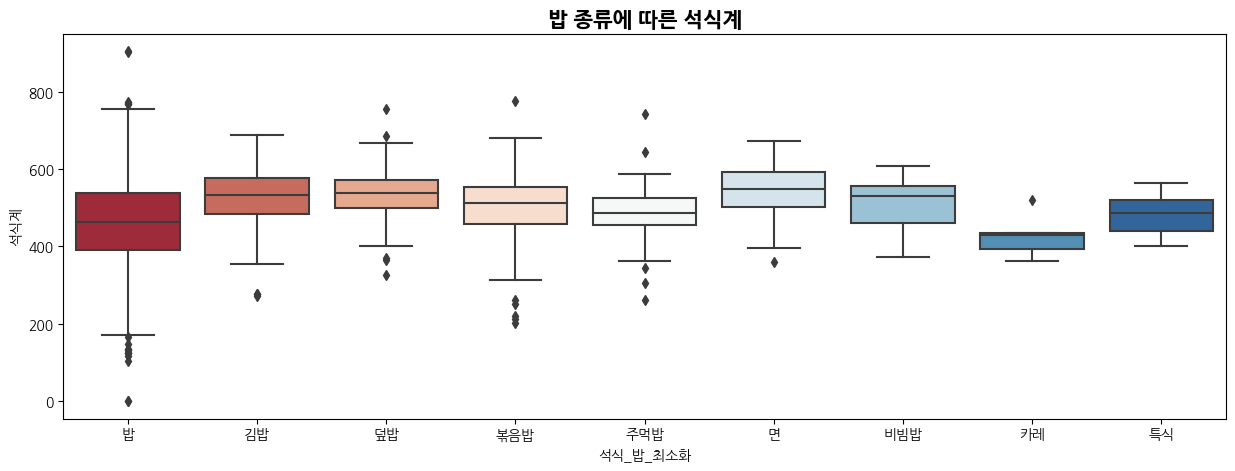

In [53]:
train_preprocessed['중식_밥_최소화'] = train_preprocessed['중식_밥'].map(bob_minimization)
# plt.figure(figsize=(15,5))
# sns.boxplot(data = train_preprocessed, x = '중식_밥_최소화', y = '중식계', palette = "RdBu")
# plt.title('밥 종류에 따른 중식계', fontsize = 15, weight = 'bold')

train_preprocessed['석식_밥_최소화'] = train_preprocessed['석식_밥'].map(bob_minimization)
plt.figure(figsize=(15,5))
sns.boxplot(data = train_preprocessed, x = '석식_밥_최소화', y = '석식계', palette = "RdBu")
plt.title('밥 종류에 따른 석식계', fontsize = 15, weight = 'bold')

In [54]:
test['중식_밥_최소화'] = test['중식_밥'].map(bob_minimization)
test['석식_밥_최소화'] = test['석식_밥'].map(bob_minimization)
print(test['중식_밥'].map(bob_minimization).value_counts().index.tolist())
print(test['석식_밥'].map(bob_minimization).value_counts().index.tolist())

['밥', '비빔밥', '덮밥']
['밥', '덮밥', '볶음밥', '김밥', '주먹밥', '면', '비빔밥']


###### 국 최소화
***
* 양념베이스, 맑은국, 고깃국 ,,,
* EDA도 중요하지만 최종적으로 <font color=pink>__분석에 유의미 하도록 분류__</font>하는 것이 맞다고 생각

In [55]:
print('=====중식=====')
print(train_preprocessed['중식_국'].value_counts().index.tolist())
print(len(train_preprocessed['중식_국'].value_counts().index.tolist()), '\n\n')
print('=====석식=====')
print(train_preprocessed['석식_국'].value_counts().index.tolist())
print(len(train_preprocessed['석식_국'].value_counts().index.tolist()))

=====중식=====
[['콩나물국'], ['맑은국'], ['된장찌개'], ['어묵국'], ['아욱국'], ['근대국'], ['배추된장국'], ['꽃게탕'], ['순두부찌개'], ['차돌박이찌개'], ['열무된장국'], ['미역국'], ['고추장찌개'], ['육개장'], ['가쯔오장국'], ['미소장국'], ['쇠고기샤브국'], ['시래기국'], ['부대찌개'], ['팽이장국'], ['돈육김치찌개'], ['들깨시래기국'], ['시금치된장국'], ['얼갈이된장국'], ['오징어국'], ['유부장국'], ['쇠고기미역국'], ['쇠고기무국'], ['황태국'], ['연두부탕'], ['해물된장찌개'], ['아욱된장국'], ['알탕'], ['떡국'], ['콩비지찌개'], ['시금치국'], ['도토리묵냉국'], ['참치김치찌개'], ['닭개장'], ['소고기미역국'], ['수제비국'], ['대구매운탕'], ['콩나물김치국'], ['북어국'], ['건새우아욱국'], ['두부김치국'], ['얼갈이국'], ['우거지해장국'], ['콩가루배추국'], ['들깨미역국'], ['북어계란국'], ['무채국'], ['근대된장국'], ['봄동된장국'], ['매운콩나물국'], ['유부주머니국'], ['닭곰탕'], ['동태탕'], ['동태찌개'], ['김치콩나물국'], ['오이냉국'], ['들깨버섯국'], ['가쯔오국'], ['옹심이만두국'], ['냉이된장찌개'], ['홍합탕'], ['미역장국'], ['매운어묵국'], ['차돌된장찌개'], ['북엇국'], ['어묵탕'], ['계란국'], ['차돌박이된장찌개'], ['사골떡국'], ['해물순두부찌개'], ['김치두부국'], ['맑은콩나물국'], ['시래기된장국'], ['북어콩나물국'], ['사과오이냉국'], ['버섯들깨탕'], ['청국장찌개'], ['소고기무국'], ['민물새우찌개'], ['매운소고기국'], ['삼계탕'], ['김치찌개'], ['우무묵냉국'], ['설렁탕'], ['조랭이떡미역국'], ['우거지국'], ['북어해장국'], ['냉

In [56]:
def gook_minimization(menu):
    
    if str(menu).find('찌개') >= 0:
        menu = '찌개'
#     elif str(menu).find('국') >= 0:
#         menu = '국'
    elif (str(menu).find('곰탕') >= 0 or str(menu).find('설렁탕') >= 0
         or str(menu).find('갈비탕') >= 0 or str(menu).find('돈신탕') >= 0
         or str(menu).find('쇠고기무국') >= 0 or str(menu).find('쇠고기샤브') >= 0
         or str(menu).find('소고기당면') >= 0 or str(menu).find('소고기샤브') >= 0
         or str(menu).find('소고기무') >= 0  or str(menu).find('쇠고기느타리') >= 0
         or str(menu).find('쇠고기국') >= 0):
        menu = '고기-맑은국물'
    elif (str(menu).find('소고기국') >= 0 or str(menu).find('개장') >= 0
         or str(menu).find('소고기매운') >= 0 or str(menu).find('매운소고기') >= 0
         or str(menu).find('매운쇠고기') >= 0 or str(menu).find('쇠고기매운') >= 0
         or str(menu).find('쇠고기해장') >= 0 or str(menu).find('뼈해장') >= 0
         or str(menu).find('고기짬뽕') >= 0):
        menu = '고기-빨간국물'
    elif (str(menu).find('북어') >= 0 or str(menu).find('황태') >= 0
         or str(menu).find('북엇') >= 0 or str(menu).find('대구지리') >= 0):
        menu = '생선-맑은국물'
    elif (str(menu).find('동태') >= 0 or str(menu).find('알탕') >= 0
         or str(menu).find('대구탕') >= 0 or str(menu).find('대구매운') >= 0
         or str(menu).find('아귀매운') >= 0):
        menu = '생선-빨간국물'
    elif (str(menu).find('된장국') >= 0 or str(menu).find('아욱국') >= 0
         or str(menu).find('시래기국') >= 0 or str(menu).find('미소') >= 0
         or str(menu).find('팽이') >= 0 or str(menu).find('시락') >= 0
         or str(menu).find('시금치') >= 0  or str(menu).find('우거지') >= 0
         or str(menu).find('얼갈이') >= 0 or str(menu).find('근대') >= 0
         or str(menu).find('시래기') >= 0 or str(menu).find('유부장') >= 0 ):
        menu = '된장국물'
    elif str(menu).find('떡국') >= 0 or str(menu).find('토란') >= 0:
        menu = '떡국'
    elif str(menu).find('스프') >= 0 :
        menu = '스프'
    elif str(menu).find('어묵') >= 0 or str(menu).find('유부주머니') >= 0:
        menu = '어묵탕'
    elif (str(menu).find('국수') >= 0 or str(menu).find('모밀') >= 0 
          or str(menu).find('우동') >= 0 or str(menu).find('모밀') >= 0):
        menu = '면'
    elif str(menu).find('미역') >= 0 :
        menu = '미역국'
    elif str(menu).find('만두') >= 0 or str(menu).find('만둣') >= 0 :
        menu = '만두국'
    elif str(menu).find('없음') >= 0 :
        menu = '없음'
    elif str(menu).find('삼계') >= 0 or str(menu).find('백숙') >= 0:
        menu = '삼계탕'
    elif str(menu).find('감자탕') >= 0 :
        menu = '감자탕'
    elif str(menu).find('국밥') >= 0 :
        menu = '국밥'
    else:
        menu = '기타국'
    
    return menu

In [57]:
print(train_preprocessed['중식_국'].map(gook_minimization).value_counts().index.tolist())
print(train_preprocessed['석식_국'].map(gook_minimization).value_counts().index.tolist())
# 소고기당면 쇠고기샤브 쇠고기해장

['기타국', '된장국물', '찌개', '미역국', '고기-맑은국물', '어묵탕', '고기-빨간국물', '생선-맑은국물', '생선-빨간국물', '떡국', '만두국', '면', '삼계탕', '스프', '감자탕', '없음', '국밥']
['기타국', '찌개', '된장국물', '면', '고기-빨간국물', '고기-맑은국물', '어묵탕', '미역국', '스프', '생선-맑은국물', '생선-빨간국물', '만두국', '감자탕', '떡국', '국밥', '삼계탕', '없음']


Text(0.5, 1.0, ' 국 종류에 따른 석식계')

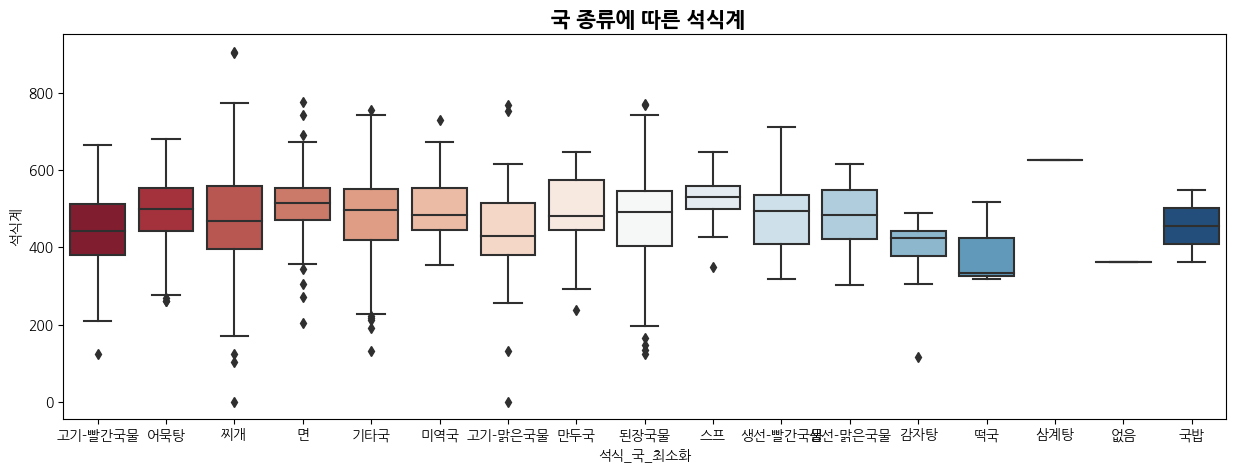

In [58]:
train_preprocessed['중식_국_최소화'] = train_preprocessed['중식_국'].map(gook_minimization)
# plt.figure(figsize=(15,5))
# sns.boxplot(data = train_preprocessed, x = '중식_국_최소화', y = '중식계', palette = "RdBu");
# plt.title(' 국 종류에 따른 중식계', fontsize = 15, weight = 'bold')
train_preprocessed['석식_국_최소화'] = train_preprocessed['석식_국'].map(gook_minimization)
plt.figure(figsize=(15,5))
sns.boxplot(data = train_preprocessed, x = '석식_국_최소화', y = '석식계', palette = "RdBu")
plt.title(' 국 종류에 따른 석식계', fontsize = 15, weight = 'bold')

Text(0.5, 1.0, ' 국종류에 따른 석식계')

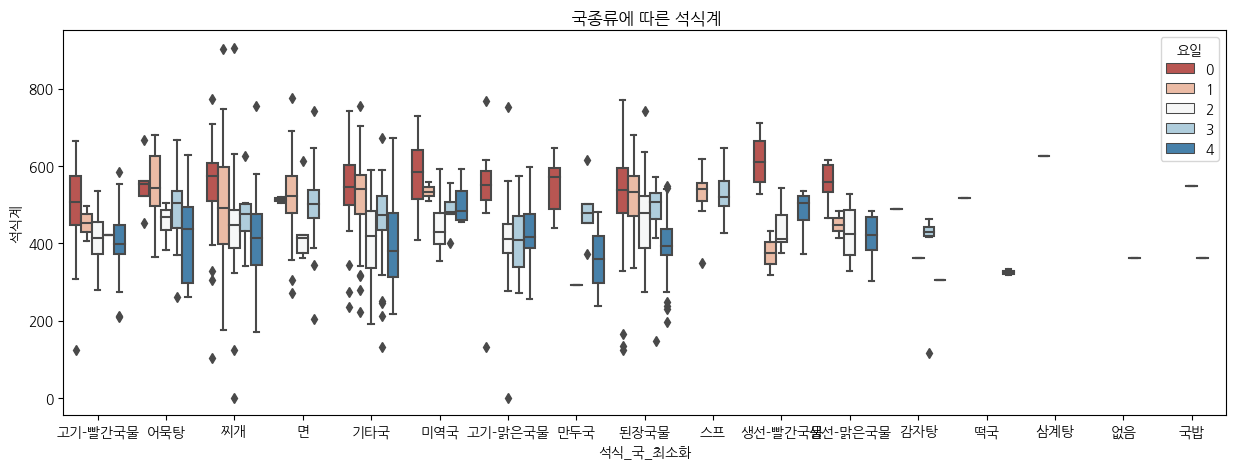

In [59]:
train_preprocessed['중식_국_최소화'] = train_preprocessed['중식_국'].map(gook_minimization)
# plt.figure(figsize=(15,5))
# sns.boxplot(data = train_preprocessed, x = '중식_국_최소화', y = '중식계', hue = '요일', palette = "RdBu");
# plt.title(' 국종류에 따른 중식계')

train_preprocessed['석식_국_최소화'] = train_preprocessed['석식_국'].map(gook_minimization)
plt.figure(figsize=(15,5))
sns.boxplot(data = train_preprocessed, x = '석식_국_최소화', y = '석식계', hue = '요일', palette = "RdBu");
plt.title(' 국종류에 따른 석식계')

In [60]:
# def remove_not찌개(menu):
    
#     if str(menu).find('찌개') < 0:
#         menu = 0
#     return menu

In [61]:
# print(train_preprocessed['중식_국'].map(remove_not찌개).value_counts().index.tolist())

In [62]:
test['중식_국_최소화'] = test['중식_국'].map(gook_minimization)
test['석식_국_최소화'] = test['석식_국'].map(gook_minimization)
print(test['중식_국'].map(gook_minimization).value_counts().index.tolist())
print(test['석식_국'].map(gook_minimization).value_counts().index.tolist())

['된장국물', '기타국', '찌개', '고기-맑은국물', '생선-맑은국물', '어묵탕', '떡국', '미역국', '고기-빨간국물', '만두국']
['기타국', '찌개', '면', '고기-빨간국물', '된장국물', '어묵탕', '미역국', '고기-맑은국물', '만두국', '스프', '생선-빨간국물']


###### 메인 메뉴 최소화

In [63]:
print('=====중식=====')
print(train_preprocessed['중식_메인'].value_counts().index.tolist())
print(len(train_preprocessed['중식_메인'].value_counts().index.tolist()), '\n\n')
print('=====석식=====')
print(train_preprocessed['석식_메인'].value_counts().index.tolist())
print(len(train_preprocessed['석식_메인'].value_counts().index.tolist()))

=====중식=====
[['오징어볶음'], ['닭갈비'], ['버섯불고기'], ['훈제오리구이'], ['짬뽕불고기'], ['돈육굴소스볶음'], ['제육볶음'], ['등갈비김치찜'], ['언양식불고기'], ['주꾸미볶음'], ['닭볶음탕'], ['미니채소떡갈비'], ['소불고기'], ['해물누룽지탕'], ['돼지갈비찜'], ['유자청제육볶음'], ['갈치구이'], ['탕수어'], ['굴비구이'], ['쇠고기장조림'], ['동파삼겹수육'], ['소고기장조림'], ['안동찜닭'], ['고추잡채*꽃빵'], ['사천식탕수육'], ['매운돼지갈비찜'], ['유린기'], ['치킨핑거'], ['쇠고기낙지볶음'], ['쇠고기숙주볶음'], ['소고기숙주볶음'], ['순살파닭'], ['마늘치킨'], ['돈육강정'], ['닭오븐구이'], ['닭데리야끼조림'], ['오징어볶음*소면'], ['깐풍기'], ['레몬탕수육'], ['동파육'], ['돈육간장불고기'], ['류산슬'], ['오리불고기'], ['수제돈까스'], ['미트볼케찹조림'], ['오징어튀김'], ['돈육간장볶음'], ['닭강정'], ['소고기낙지볶음'], ['돈육장조림'], ['유산슬'], ['매운닭찜'], ['돈육김치볶음'], ['고구마치즈구이'], ['마늘간장치킨'], ['가자미튀김'], ['춘천닭갈비'], ['떡갈비조림'], ['주꾸미떡볶음'], ['누룽지탕수육'], ['유자청돈육볶음'], ['코다리강정'], ['해물청경채볶음'], ['매운주꾸미볶음'], ['가자미카레튀김'], ['닭볶음'], ['목살스테이크'], ['소고기불고기'], ['치즈함박스테이크'], ['낙지볶음'], ['쇠불고기'], ['소갈비찜'], ['오리대패불고기'], ['오향장육'], ['고등어구이'], ['고등어김치말이'], ['찜닭'], ['돈육고추장볶음'], ['순살양념치킨'], ['간장찜닭'], ['오리고추장볶음'], ['꽁치한마리구이'], ['레몬유린기'], ['한방소갈비찜'], ['오삼불고기'], ['삼겹살구이'], ['돈육칠리강정']

In [64]:
words = {
    '돼지': ['춘권','햄','도시락','제육','오향장육','류산슬','핫도그','등뼈','자장','미트','산적','소떡','만두','꿔바로우', '소세지'
           ,'돈','돈육', '삼겹살', '목살', '항정살', '갈비', '꽃등심', '두루치기', '보쌈', '훈제', '고기전골', '족발','돼지',
            '너비아니','짜장','딤섬','깐풍기','탕수육','바베큐','불고기','완자','대패','카츠','깐풍','삼겹','퀘사디아', '함박',
          '삼색전', '동그랑땡','동파육'],
    '소': ['사골','쇠','소고기', '갈비살', '양지머리','육전','양지불고기','스테이크', '차돌박이', '등심', '안심', '사태'
          , '양념갈비','소갈비','모둠장조림', '모듬장조림'],
    '닭': ['닭가슴살','궁보계정','장각','코코뱅', '치킨','교촌', '양념치킨', '후라이드', '간장치킨', '닭볶음탕','닭','유린'],
    '생선' : ['생선','꽁치','해물','홍어','코다리','적어','참치','방어','동태','꽁채','아귀','갈치','열기어',
           '장어', '가자미','조기', '임연수찜', '명태', '임연수', '황태','고등어','꽁치','삼치', '광어회', '연어덮밥','탕수어'],
    '생선외해산물': ['새우','주꾸미','쭈꾸미','굴비','멘보샤','골뱅이','낙지','어묵','오징어', '꽃게','홍합','멍게','양장피',
            '게장', '전복죽', '맛살','유산슬', '타코야끼'],
    '오리' : ['오리'],
    '채소' : ['두부','고구마','고추잡채','메밀','고추튀김','또띠아','가지','순대','가지','김말이','생야채','사라다','포기','팽이','채소'
            ,'쌈추','양송이','부추전','고로케','브로콜리','깻잎','양파링', '봄나물','부추고추전', '야채','샐러드', '감자', '시금치',
            '단호박', '옥수수', '버섯', '오복지무침'],
    '면' : ['우동','페스토','알리오','파스타','스파게티','국수','라볶이','쫄면'],
    '피자' :['피자'],
    '기타' : ['가래떡', '된장', '날치알볶음밥', '치즈볼', '국밥', '철판볶음밥', '모듬튀김', '김치전', '떡볶이', '찹쌀밥', '궁중떡찜',
           '장국', '스프', '모둠튀김','궁중떡볶음', '볶음밥', '버거', '맑은국', '탕평채'],
    '계란' : ['삶은달걀', '계란', '메추리알'],
    '없음' : ['없음']
}


In [65]:
def 분류(menu):
    for key, values in words.items():
        for value in values:
            if value in str(menu):
                menu = key
    return menu

In [66]:
print('===train_preprocessed===')
print(train_preprocessed['중식_메인'].map(분류).value_counts().index.tolist())
print(train_preprocessed['석식_메인'].map(분류).value_counts().index.tolist(), '\n\n')

print('===test===')
test['중식_메인_최소화'] = test['중식_메인'].map(분류)
test['석식_메인_최소화'] = test['석식_메인'].map(분류)
print(test['중식_메인'].map(분류).value_counts().index.tolist())
print(test['석식_메인'].map(분류).value_counts().index.tolist())

===train_preprocessed===
['돼지', '닭', '생선', '생선외해산물', '소', '채소', '기타', '오리', '면', '계란', '없음']
['돼지', '생선', '채소', '닭', '생선외해산물', '기타', '소', '면', '피자'] 


===test===
['돼지', '생선', '닭', '생선외해산물', '소', '채소']
['돼지', '생선', '채소', '생선외해산물', '기타', '닭']


Text(0.5, 1.0, ' 메인메뉴 종류에 따른 석식계')

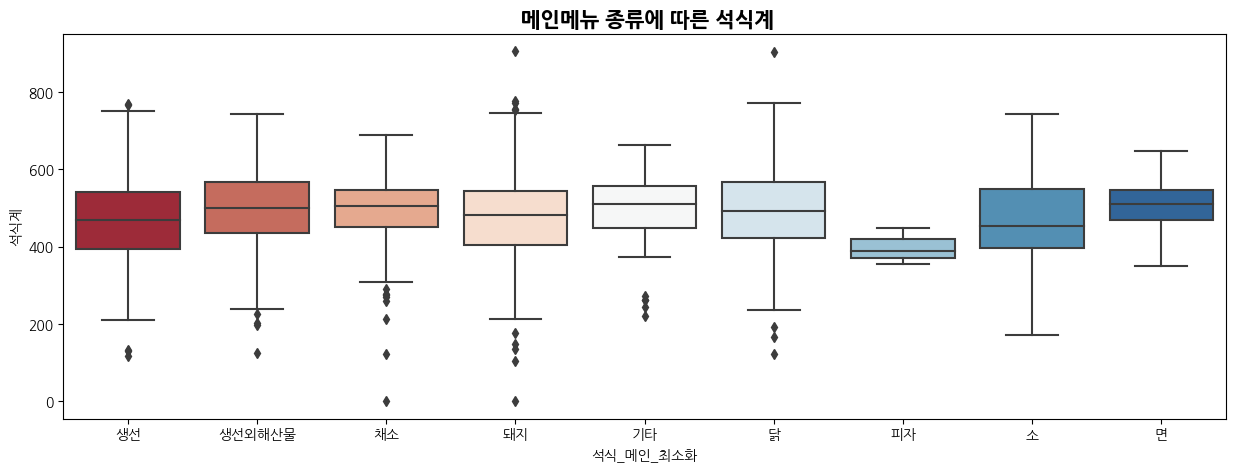

In [67]:
train_preprocessed['중식_메인_최소화'] = train_preprocessed['중식_메인'].map(분류)
# plt.figure(figsize=(15,5))
# sns.boxplot(data = train_preprocessed, x = '중식_메인_최소화', y = '중식계' ,palette = "RdBu");
# plt.title(' 메인메뉴 종류에 따른 중식계', fontsize = 15, weight = 'bold')

train_preprocessed['석식_메인_최소화'] = train_preprocessed['석식_메인'].map(분류)
plt.figure(figsize=(15,5))
sns.boxplot(data = train_preprocessed, x = '석식_메인_최소화', y = '석식계',palette = "RdBu")
plt.title(' 메인메뉴 종류에 따른 석식계', fontsize = 15, weight = 'bold')

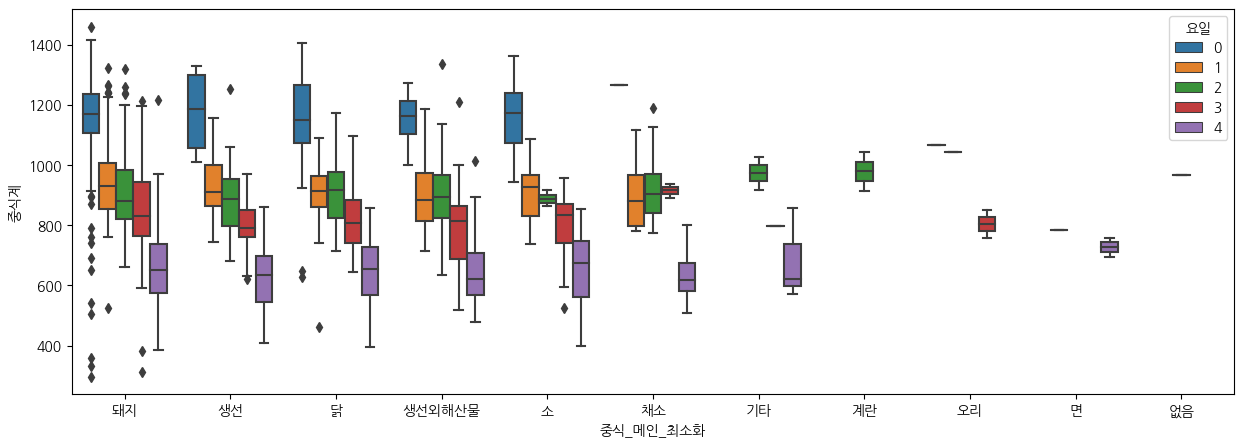

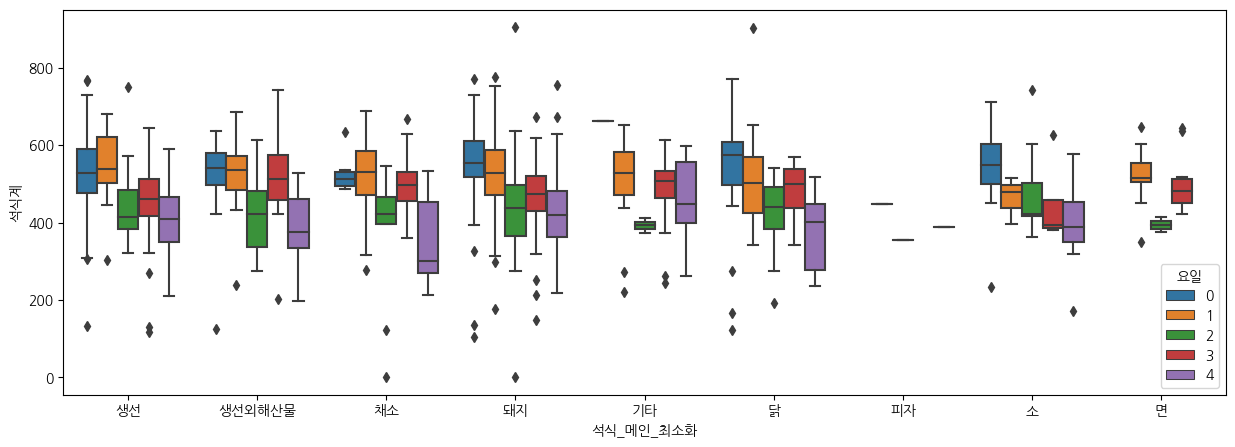

In [68]:
train_preprocessed['중식_메인_최소화'] = train_preprocessed['중식_메인'].map(분류)
plt.figure(figsize=(15,5))
sns.boxplot(data = train_preprocessed, x = '중식_메인_최소화', y = '중식계', hue = '요일');

train_preprocessed['석식_메인_최소화'] = train_preprocessed['석식_메인'].map(분류)
plt.figure(figsize=(15,5))
sns.boxplot(data = train_preprocessed, x = '석식_메인_최소화', y = '석식계', hue = '요일');

#### VIF 확인해보기

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_preprocessed[['요일','본사정원수','본사휴가자수','본사출장자수','현본사소속재택근무자수','본사시간외근무명령서승인건수']].values, i) 
                     for i in range(train_preprocessed[['요일','본사정원수','본사휴가자수','본사출장자수','현본사소속재택근무자수','본사시간외근무명령서승인건수']].shape[1])]
vif["features"] = train_preprocessed[['요일','본사정원수','본사휴가자수','본사출장자수','현본사소속재택근무자수','본사시간외근무명령서승인건수']].columns
display(vif.sort_values(by='VIF Factor', ascending=False))

# 다중공선성 문제를 해결하기 위해 본사정원수로 나누어 변수를 합쳐주는게 나아보임 EX) 출장자 비율

,VIF Factor,features
1,77.607456,본사정원수
3,69.760499,본사출장자수
0,6.395924,요일
5,3.839170,본사시간외근무명령서승인건수
2,3.343813,본사휴가자수
4,1.735769,현본사소속재택근무자수


<font color=pink>__본사정원수로 파생변수를 만드는게 나아보임__</font>

#### 파생변수 만들기 및 변수 추가

본사정원수 파생변수 만들기

In [70]:
# train_preprocessed['출장자비율'] = train_preprocessed['본사출장자수'] / train_preprocessed['본사정원수']
# train_preprocessed['휴가자비율'] = train_preprocessed['본사휴가자수'] / train_preprocessed['본사정원수']
# train_preprocessed['추가근무자비율'] = train_preprocessed['본사시간외근무명령서승인건수']/train_preprocessed['본사정원수']
# train_preprocessed['재택근무자비율'] = train_preprocessed['현본사소속재택근무자수']/train_preprocessed['본사정원수']
train_preprocessed.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,...,중식_메인,석식_밥,석식_국,석식_메인,중식_밥_최소화,석식_밥_최소화,중식_국_최소화,석식_국_최소화,중식_메인_최소화,석식_메인_최소화
0,2016-02-01,0,2601,50,150,238,0,"[쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]",1039,...,[쇠불고기],[쌀밥/잡곡밥],[육개장],[자반고등어구이],밥,밥,찌개,고기-빨간국물,돼지,생선
1,2016-02-02,1,2601,50,173,319,0,"[쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추...","[콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]",867,...,[가자미튀김],[콩나물밥*양념장],[어묵국],[유산슬],밥,밥,찌개,어묵탕,생선,생선외해산물


In [71]:
# test['출장자비율'] = test['본사출장자수'] / test['본사정원수']
# test['휴가자비율'] = test['본사휴가자수'] / test['본사정원수']
# test['추가근무자비율'] = test['본사시간외근무명령서승인건수']/test['본사정원수']
# test['재택근무자비율'] = test['현본사소속재택근무자수']/test['본사정원수']
test.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식_밥,...,중식_메인,석식_밥,석식_국,석식_메인,중식_밥_최소화,석식_밥_최소화,중식_국_최소화,석식_국_최소화,중식_메인_최소화,석식_메인_최소화
0,2021-01-27,2,2983,88,182,5,358,"[쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]",[쌀밥/잡곡밥],...,[쇠불고기],[쌀밥/잡곡밥],[육개장],[자반고등어구이],밥,밥,찌개,고기-빨간국물,돼지,생선
1,2021-01-28,3,2983,104,212,409,348,"[쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추...","[콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]",[쌀밥/잡곡밥],...,[가자미튀김],[콩나물밥*양념장],[어묵국],[유산슬],밥,밥,찌개,어묵탕,생선,생선외해산물


공휴일 전날 파생변수 만들기

In [72]:
test['일자'].min(), test['일자'].max()

('2021-01-27', '2021-04-09')

In [73]:
train_공휴일_전날 = {'2016-02-06': '설날',
                '2016-02-07': '설날',
                '2016-02-08': '설날',
                '2016-02-29': '3.1절',
                '2016-04-12': '20대 국회의원 선거',
                '2016-05-04': '어린이날',
                '2016-06-05': '현충일',
                '2016-08-14': '광복절',
                '2016-09-13': '추석',
                '2016-10-03': '개천절',
                '2016-10-08': '한글날',
                '2016-12-24': '크리스마스',
                '2016-12-31': '신정',
                '2017-01-26': '설날',
                '2017-01-27': '설날',
                '2017-02-28': '3.1절',
                '2017-05-02': '석가탄신일',
                '2017-05-04': '어린이날',
                '2017-06-05': '현충일',
                '2017-08-14': '광복절',
                '2017-10-02': '개천절',
                '2017-10-03': '추석',
                '2017-10-08': '한글날',
                '2017-12-24': '크리스마스',
                '2017-12-30': '신정',
                '2018-02-14': '설날',
                '2018-02-15': '설날',
                '2018-02-16': '설날',
                '2018-02-28': '3.1절',
                '2018-05-04': '어린이날',
                '2018-05-21': '석가탄신일',
                '2018-06-05': '현충일',
                '2018-06-12': '지방선거',
                '2018-08-14': '광복절',
                '2018-09-23': '추석',
                '2018-10-02': '개천절',
                '2018-10-08': '한글날',
                '2018-12-24': '크리스마스',
                '2018-12-31': '신정',
                '2019-02-03': '설날',
                '2019-02-04': '설날',
                '2019-02-05': '설날',
                '2019-02-28': '3.1절',
                '2019-05-04': '어린이날',
                '2019-05-11': '석가탄신일',
                '2019-06-05': '현충일',
                '2019-08-14': '광복절',
                '2019-09-11': '추석',
                '2019-10-02': '개천절',
                '2019-10-08': '한글날',
                '2019-12-24': '크리스마스',
                '2019-12-31': '신정',
                '2020-01-23': '설날',
                '2020-01-24': '설날',
                '2020-04-14': '제21대 국회의원 선거',
                '2020-04-29': '부처님 오신 날',
                '2020-05-04': '어린이날',
                '2020-06-05': '현충일',
                '2020-08-14': '광복절',
                '2020-09-29': '추석',
                '2020-10-01': '추석',
                '2020-10-02': '추석',
                '2020-10-03': '개천절',
                '2020-10-08': '한글날',
                '2020-12-24': '크리스마스',
                '2020-12-31': '신정',
                '2021-02-10': '설날'}

In [74]:
train_공휴일_전날.keys()

dict_keys(['2016-02-06', '2016-02-07', '2016-02-08', '2016-02-29', '2016-04-12', '2016-05-04', '2016-06-05', '2016-08-14', '2016-09-13', '2016-10-03', '2016-10-08', '2016-12-24', '2016-12-31', '2017-01-26', '2017-01-27', '2017-02-28', '2017-05-02', '2017-05-04', '2017-06-05', '2017-08-14', '2017-10-02', '2017-10-03', '2017-10-08', '2017-12-24', '2017-12-30', '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-28', '2018-05-04', '2018-05-21', '2018-06-05', '2018-06-12', '2018-08-14', '2018-09-23', '2018-10-02', '2018-10-08', '2018-12-24', '2018-12-31', '2019-02-03', '2019-02-04', '2019-02-05', '2019-02-28', '2019-05-04', '2019-05-11', '2019-06-05', '2019-08-14', '2019-09-11', '2019-10-02', '2019-10-08', '2019-12-24', '2019-12-31', '2020-01-23', '2020-01-24', '2020-04-14', '2020-04-29', '2020-05-04', '2020-06-05', '2020-08-14', '2020-09-29', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-08', '2020-12-24', '2020-12-31', '2021-02-10'])

In [75]:
전날 = {}
for i in train_공휴일_전날.keys():
    
    전날[i] = 1
    
train_preprocessed['공휴일_전날'] = train_preprocessed['일자'].map(전날).fillna(0).astype(int)
train_preprocessed.loc[train_preprocessed['요일'] == 4,'공휴일_전날'] = 1

train_preprocessed.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,...,석식_밥,석식_국,석식_메인,중식_밥_최소화,석식_밥_최소화,중식_국_최소화,석식_국_최소화,중식_메인_최소화,석식_메인_최소화,공휴일_전날
0,2016-02-01,0,2601,50,150,238,0,"[쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]",1039,...,[쌀밥/잡곡밥],[육개장],[자반고등어구이],밥,밥,찌개,고기-빨간국물,돼지,생선,0
1,2016-02-02,1,2601,50,173,319,0,"[쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추...","[콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]",867,...,[콩나물밥*양념장],[어묵국],[유산슬],밥,밥,찌개,어묵탕,생선,생선외해산물,0


In [76]:
test_공휴일_전날 = {'2021-02-10': '설날',
                     '2021-02-11': '설날',
                     '2021-02-12': '설날',
                     '2021-02-13': '설날',
                     '2021-02-28': '3.1절'}

In [77]:
전날 = {}
for i in test_공휴일_전날.keys():
    
    전날[i] = 1
    
test['공휴일_전날'] = test['일자'].map(전날).fillna(0).astype(int)
test.loc[test['요일'] == 4,'공휴일_전날'] = 1

test.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식_밥,...,석식_밥,석식_국,석식_메인,중식_밥_최소화,석식_밥_최소화,중식_국_최소화,석식_국_최소화,중식_메인_최소화,석식_메인_최소화,공휴일_전날
0,2021-01-27,2,2983,88,182,5,358,"[쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]",[쌀밥/잡곡밥],...,[쌀밥/잡곡밥],[육개장],[자반고등어구이],밥,밥,찌개,고기-빨간국물,돼지,생선,0
1,2021-01-28,3,2983,104,212,409,348,"[쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추...","[콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]",[쌀밥/잡곡밥],...,[콩나물밥*양념장],[어묵국],[유산슬],밥,밥,찌개,어묵탕,생선,생선외해산물,0


In [78]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_preprocessed[['요일','본사휴가자수','본사출장자수','현본사소속재택근무자수','본사시간외근무명령서승인건수']].values, i) 
                     for i in range(train_preprocessed[['요일','본사휴가자수','본사출장자수','현본사소속재택근무자수','본사시간외근무명령서승인건수']].shape[1])]
vif["features"] = train_preprocessed[['요일','본사휴가자수','본사출장자수','현본사소속재택근무자수', '본사시간외근무명령서승인건수']].columns
display(vif.sort_values(by='VIF Factor', ascending=False))

,VIF Factor,features
2,10.015406,본사출장자수
0,5.873000,요일
4,3.285928,본사시간외근무명령서승인건수
1,2.044216,본사휴가자수
3,1.253416,현본사소속재택근무자수


<font color=pink>__출장자비율__</font>의 VIF 값이 9점대로 높긴 하지만 10 이하면 <font color=pink>__매우 큰 값은 아님__</font>  
> 모델 <font color=pink>__돌려보고 결정__</font>해야할듯

#### 상관계수 다시보기

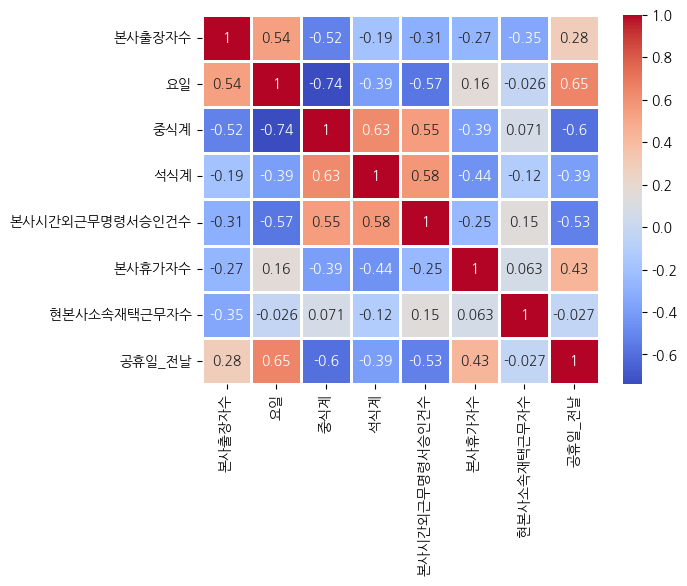

In [79]:
use_col = ['본사출장자수', '요일', '중식계', '석식계','본사시간외근무명령서승인건수', '본사휴가자수', '현본사소속재택근무자수', '공휴일_전날']
train_corr_matrix = train_preprocessed[use_col].corr()
sns.heatmap(train_corr_matrix, annot=True, linewidth=1, cmap='coolwarm');

#### OLS 구해보기

In [80]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

print('===중식계 OLS===')
중식계 = smf.ols(formula='중식계 ~ 본사출장자수 + 요일 + 공휴일_전날 +  본사시간외근무명령서승인건수 + 본사휴가자수 + 현본사소속재택근무자수',
              data=train_preprocessed).fit()
display(중식계.summary(), '\n\n')

print('===석식계 OLS===')
석식계 = smf.ols(formula='석식계 ~ 본사출장자수 + 요일 + 공휴일_전날 +  본사시간외근무명령서승인건수 + 본사휴가자수 + 현본사소속재택근무자수',
              data=train_preprocessed).fit()
display(석식계.summary())

===중식계 OLS===


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    중식계   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     492.0
Date:                Wed, 05 Apr 2023   Prob (F-statistic):          4.55e-314
Time:                        17:57:22   Log-Likelihood:                -7134.6
No. Observations:                1163   AIC:                         1.428e+04
Df Residuals:                    1156   BIC:                         1.432e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1559.0711     27.165     57.394      0.000    1505.774    1612.368
본사출장자수            -1.9819      0.108    -18.273      0.000      -2.195      -1.769
요일               -59.2328      3.702    -16.000      0.000     -66.496     -51.969
공휴일_전날             8.2726     11.654      0.710      0.478     -14.593      31.139
본사시간외근무명령서승인건수     0.0952      0.017      5.556      0.000       0.062       0.129
본사휴가자수            -0.5957      0.029    -20.830      0.000      -0.652      -0.540
현본사소속재택근무자수       -0.1399      0.033     -4.247      0.000      -0.204      -0.075
==============================================================================
Omnibus:                       15.057   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               24.602
Skew:                          -0.037   Prob(JB):                     4.55e-06
Kurtosis:                       3.709   Cond. No.                     3.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

'\n\n'

===석식계 OLS===


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    석식계   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     204.2
Date:                Wed, 05 Apr 2023   Prob (F-statistic):          1.84e-177
Time:                        17:57:22   Log-Likelihood:                -6704.9
No. Observations:                1163   AIC:                         1.342e+04
Df Residuals:                    1156   BIC:                         1.346e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        656.9545     18.772     34.996      0.000     620.123     693.786
본사출장자수            -0.7972      0.075    -10.636      0.000      -0.944      -0.650
요일                 3.8608      2.558      1.509      0.132      -1.159       8.880
공휴일_전날            29.4715      8.054      3.659      0.000      13.670      45.273
본사시간외근무명령서승인건수     0.2262      0.012     19.099      0.000       0.203       0.249
본사휴가자수            -0.3374      0.020    -17.075      0.000      -0.376      -0.299
현본사소속재택근무자수       -0.2729      0.023    -11.992      0.000      -0.318      -0.228
==============================================================================
Omnibus:                      156.276   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              614.655
Skew:                          -0.592   Prob(JB):                    3.38e-134
Kurtosis:                       6.359   Cond. No.                     3.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
# from sklearn.model_selection import train_test_split

# use_col = ['출장자비율', '요일', '공휴일_전날' ,'추가근무자비율', '휴가자비율', '재택근무자비율']
# label_name = ['중식계']
# X = train_preprocessed.drop(columns=label_name)
# y = train_preprocessed[label_name]
# X.shape, y.shape

# X_train,X_test,y_train,y_test = train_test_split(X[use_col],y,test_size = 0.2)


In [82]:
# import statsmodels.formula.api as ols

# model=sm.OLS(y_train,X_train).fit()

# model.summary()

<font color=pink>__중식계__</font>에서는 <font color=pink>__모든 값__</font>이 <font color=pink>__통계적으로 유의__</font>하고  
<font color=pink>__석식계__</font>에서는 <font color=pink>__'요일'__</font> 변수가 <font color=pink>__통계적으로 유의하지 않다__</font>고 나옴  
> 처리는 모델 <font color=pink>__돌려보고 결정__</font>하도록

#### 더미변수 만들어주기

In [83]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_preprocessed[['요일','본사정원수','본사휴가자수','본사출장자수','현본사소속재택근무자수','본사시간외근무명령서승인건수']].values, i) 
                     for i in range(train_preprocessed[['요일','본사정원수','본사휴가자수','본사출장자수','현본사소속재택근무자수','본사시간외근무명령서승인건수']].shape[1])]
vif["features"] = train_preprocessed[['요일','본사정원수','본사휴가자수','본사출장자수','현본사소속재택근무자수','본사시간외근무명령서승인건수']].columns
display(vif.sort_values(by='VIF Factor', ascending=False))

,VIF Factor,features
1,77.607456,본사정원수
3,69.760499,본사출장자수
0,6.395924,요일
5,3.839170,본사시간외근무명령서승인건수
2,3.343813,본사휴가자수
4,1.735769,현본사소속재택근무자수


In [84]:
# train_preprocessed.columns

In [85]:
train_use_cols = ['일자', '요일', '본사출장자수', '본사휴가자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수',
            '중식_밥_최소화', '석식_밥_최소화', '중식_국_최소화', '석식_국_최소화',
            '중식_메인_최소화', '석식_메인_최소화',
            '공휴일_전날', '중식계', '석식계']
train_use = train_preprocessed[train_use_cols]
print(train_use.shape)
train_use.head()

(1163, 15)


,일자,요일,본사출장자수,본사휴가자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식_밥_최소화,석식_밥_최소화,중식_국_최소화,석식_국_최소화,중식_메인_최소화,석식_메인_최소화,공휴일_전날,중식계,석식계
0,2016-02-01,0,150,50,238,0,밥,밥,찌개,고기-빨간국물,돼지,생선,0,1039,331
1,2016-02-02,1,173,50,319,0,밥,밥,찌개,어묵탕,생선,생선외해산물,0,867,560
2,2016-02-03,2,180,56,111,0,덮밥,밥,된장국물,찌개,닭,생선,0,1017,573
3,2016-02-04,3,220,104,355,0,밥,김밥,고기-맑은국물,면,생선외해산물,채소,0,978,525
4,2016-02-05,4,181,278,34,0,밥,밥,떡국,찌개,돼지,돼지,1,925,330


In [86]:
test_use_cols = ['일자', '요일', '본사출장자수', '본사휴가자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수',
            '중식_밥_최소화', '석식_밥_최소화', '중식_국_최소화', '석식_국_최소화',
            '중식_메인_최소화', '석식_메인_최소화', '공휴일_전날']
test_use = test[test_use_cols]
print(test_use.shape)
test_use.head()

(50, 13)


,일자,요일,본사출장자수,본사휴가자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식_밥_최소화,석식_밥_최소화,중식_국_최소화,석식_국_최소화,중식_메인_최소화,석식_메인_최소화,공휴일_전날
0,2021-01-27,2,182,88,5,358,밥,밥,찌개,고기-빨간국물,돼지,생선,0
1,2021-01-28,3,212,104,409,348,밥,밥,찌개,어묵탕,생선,생선외해산물,0
2,2021-01-29,4,249,270,0,294,덮밥,밥,된장국물,찌개,닭,생선,1
3,2021-02-01,0,154,108,538,322,밥,김밥,고기-맑은국물,면,생선외해산물,채소,0
4,2021-02-02,1,186,62,455,314,밥,밥,떡국,찌개,돼지,돼지,0


In [87]:
train_요일 = train_use['요일'].map({0:'월', 1:'화',2:'수',3:'목',4:'금'}).copy()
test_요일 = test_use['요일'].map({0:'월', 1:'화',2:'수',3:'목',4:'금'}).copy()

train_use['요일'] = train_요일
test_use['요일'] = test_요일

C:\Users\juku\AppData\Local\Temp\ipykernel_24212\3370748143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_use['요일'] = train_요일
C:\Users\juku\AppData\Local\Temp\ipykernel_24212\3370748143.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_use['요일'] = test_요일


In [88]:
train_dummies = train_use.copy()

# train_dummies.columns.tolist()[6:10]
# train_dummies.columns.tolist()[10:12][0][:5]

for i in train_dummies.columns.tolist()[6:10]:
    dummy = pd.get_dummies(train_dummies[i], prefix=i[:4])
    train_dummies = pd.concat([train_dummies, dummy], axis=1)
    
for i in train_dummies.columns.tolist()[10:12]:
    dummy = pd.get_dummies(train_dummies[i], prefix=i[:5])
    train_dummies = pd.concat([train_dummies, dummy], axis=1)

dummy = pd.get_dummies(train_dummies['요일'])
train_dummies = pd.concat([train_dummies, dummy], axis=1)

# dummy = pd.get_dummies(train_dummies['공휴일_전날'], prefix = '공휴일_전날')
# train_dummies = pd.concat([train_dummies, dummy], axis=1)

# train_dummies = train_dummies.drop(columns=['공휴일_전날'])

print(train_dummies.shape)
train_dummies.head(2)

(1163, 89)


,일자,요일,본사출장자수,본사휴가자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식_밥_최소화,석식_밥_최소화,중식_국_최소화,석식_국_최소화,...,석식_메인_생선,석식_메인_생선외해산물,석식_메인_소,석식_메인_채소,석식_메인_피자,금,목,수,월,화
0,2016-02-01,월,150,50,238,0,밥,밥,찌개,고기-빨간국물,...,1,0,0,0,0,0,0,0,1,0
1,2016-02-02,화,173,50,319,0,밥,밥,찌개,어묵탕,...,0,1,0,0,0,0,0,0,0,1


#### VIF 구해보기

In [89]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_dummies.drop(columns=['일자', '요일','중식_밥_최소화', '석식_밥_최소화', '중식_국_최소화', '석식_국_최소화', '중식_메인_최소화', '석식_메인_최소화']).values, i) 
                     for i in range(train_dummies.drop(columns=['일자', '요일','중식_밥_최소화', '석식_밥_최소화', '중식_국_최소화', '석식_국_최소화', '중식_메인_최소화', '석식_메인_최소화']).shape[1])]
vif["features"] = train_dummies.drop(columns=['일자', '요일','중식_밥_최소화', '석식_밥_최소화', '중식_국_최소화', '석식_국_최소화', '중식_메인_최소화', '석식_메인_최소화']).columns
display(vif.sort_values(by='VIF Factor', ascending=False));

C:\Users\juku\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\juku\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\juku\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\juku\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\juku\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\juku\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarnin

,VIF Factor,features
40,inf,석식_국_고기-맑은국물
41,inf,석식_국_고기-빨간국물
59,inf,중식_메인_돼지
58,inf,중식_메인_닭
57,inf,중식_메인_기타
...,...,...
2,5.219584,본사시간외근무명령서승인건수
0,3.075135,본사출장자수
6,2.874795,석식계
1,2.634880,본사휴가자수


In [90]:
train_dummies = train_dummies.drop(columns=['일자', '요일','중식_밥_최소화', '석식_밥_최소화', '중식_국_최소화', '석식_국_최소화', '중식_메인_최소화', '석식_메인_최소화'])
train_dummies[train_dummies['석식계']!=0]
print(train_dummies.shape)
train_dummies.head(2)

(1163, 81)


,본사출장자수,본사휴가자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,공휴일_전날,중식계,석식계,중식_밥_덮밥,중식_밥_밥,중식_밥_볶음밥,...,석식_메인_생선,석식_메인_생선외해산물,석식_메인_소,석식_메인_채소,석식_메인_피자,금,목,수,월,화
0,150,50,238,0,0,1039,331,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,173,50,319,0,0,867,560,0,1,0,...,0,1,0,0,0,0,0,0,0,1


#### 모델 예측해보기

##### 모델 예측 전 몇가지 살펴보기

Text(0.5, 1.0, '평일 Vs 공휴일 전날\n중식계')

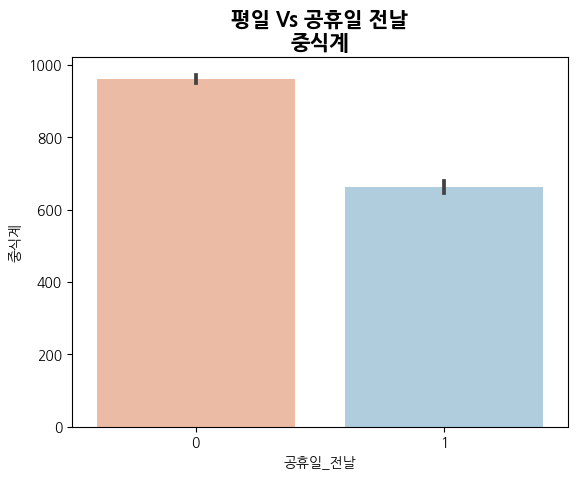

In [91]:
sns.barplot(data = train_dummies, x = '공휴일_전날', y = '중식계' , palette = "RdBu" )
plt.title('평일 Vs 공휴일 전날\n중식계', fontsize = 15, weight = 'bold')

Text(0.5, 1.0, '평일 Vs 공휴일 전날\n석식계')

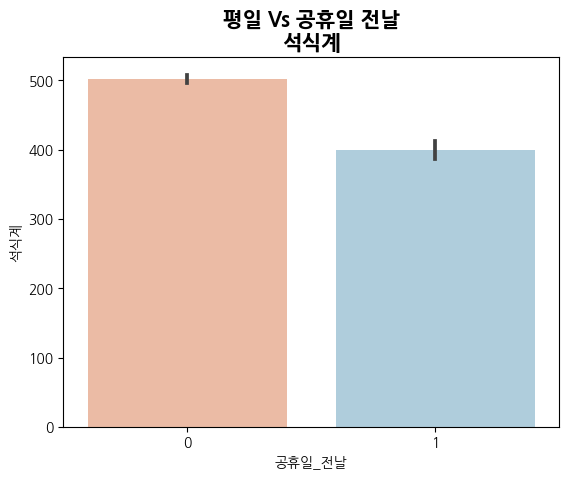

In [92]:
sns.barplot(data = train_dummies, x = '공휴일_전날', y = '석식계' , palette = "RdBu" )
plt.title('평일 Vs 공휴일 전날\n석식계', fontsize = 15, weight = 'bold')

Text(0.5, 1.0, '수치형 변수 간의 상관계수')

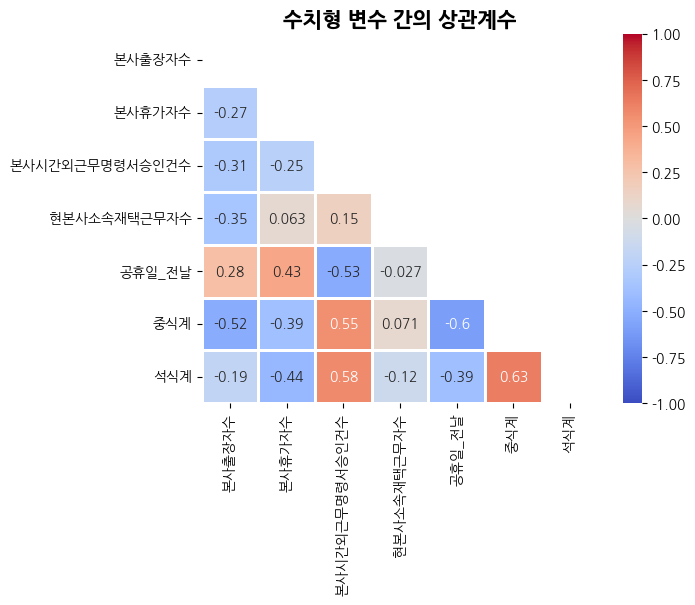

In [93]:
수치형변수_col = ['본사출장자수','본사휴가자수','본사시간외근무명령서승인건수','현본사소속재택근무자수','공휴일_전날','중식계','석식계']
# 수치형변수_col = ['본사출장자수','본사휴가자수','본사시간외근무명령서승인건수','현본사소속재택근무자수','공휴일_전날','중식계','석식계']

수치형변수_상관관계 = train_dummies[수치형변수_col].corr()
mask = np.triu(np.ones_like(수치형변수_상관관계))

sns.heatmap(수치형변수_상관관계, mask = mask,annot=True, linewidth=1, cmap='coolwarm',vmin = -1 , vmax = 1)
plt.title('수치형 변수 간의 상관계수', fontsize = 15, weight = 'bold')

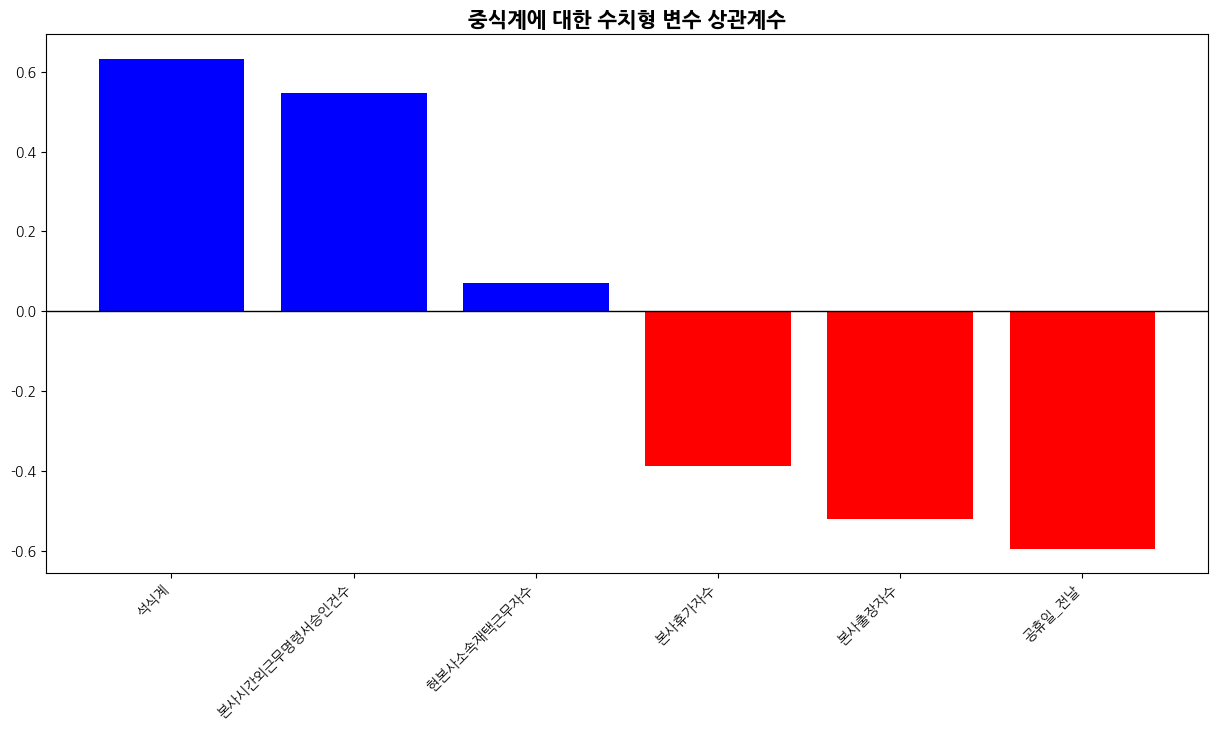

In [94]:
상관계수 = pd.DataFrame(수치형변수_상관관계['중식계'].sort_values(ascending=False)).drop(index='중식계')
상관계수['피처'] = 상관계수.index

fig, ax = plt.subplots(figsize=(15, 7))

x = 상관계수['피처']
y = 상관계수['중식계']

color_map = ['red' if i < 0 else 'blue' for i in y]

ax.bar(x, y, color=color_map)
ax.axhline(0, c = 'k', lw = 1)

# x축 라벨 회전
plt.xticks(rotation=45, ha='right')
plt.title('중식계에 대한 수치형 변수 상관계수', fontsize = 15, weight = 'bold')

plt.show()

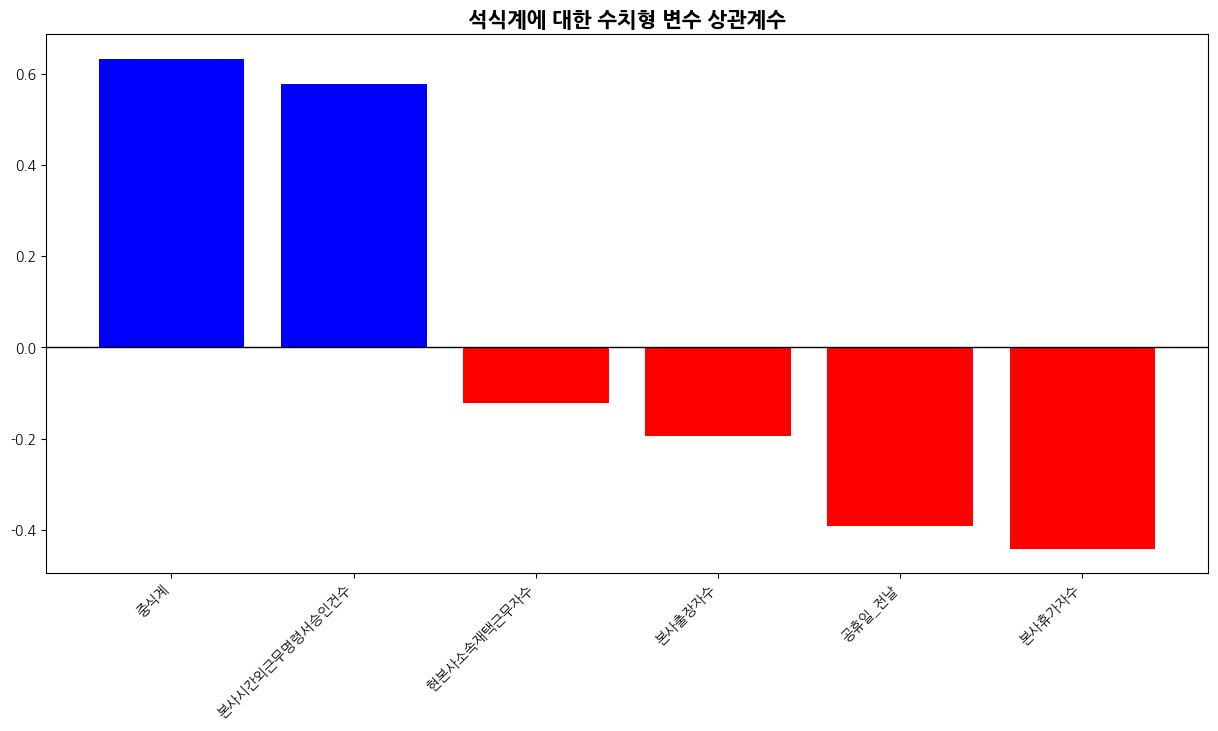

In [95]:
상관계수 = pd.DataFrame(수치형변수_상관관계['석식계'].sort_values(ascending=False)).drop(index='석식계')
상관계수['피처'] = 상관계수.index

fig, ax = plt.subplots(figsize=(15, 7))

x = 상관계수['피처']
y = 상관계수['석식계']

color_map = ['red' if i < 0 else 'blue' for i in y]

ax.bar(x, y, color=color_map)
ax.axhline(0, c = 'k', lw = 1)

# x축 라벨 회전
plt.xticks(rotation=45, ha='right')
plt.title('석식계에 대한 수치형 변수 상관계수', fontsize = 15, weight = 'bold')

plt.show()

In [96]:
train_dummies

,본사출장자수,본사휴가자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,공휴일_전날,중식계,석식계,중식_밥_덮밥,중식_밥_밥,중식_밥_볶음밥,...,석식_메인_생선,석식_메인_생선외해산물,석식_메인_소,석식_메인_채소,석식_메인_피자,금,목,수,월,화
0,150,50,238,0,0,1039,331,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,173,50,319,0,0,867,560,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,180,56,111,0,0,1017,573,1,0,0,...,1,0,0,0,0,0,0,1,0,0
3,220,104,355,0,0,978,525,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,181,278,34,0,1,925,330,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,198,75,4,391,0,1093,421,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1201,231,92,462,351,0,832,353,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1202,248,255,1,303,1,579,217,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1203,153,107,616,327,0,1145,502,0,1,0,...,1,0,0,0,0,0,0,0,1,0


##### 변수선택, 스케일링 등 아무것도 조정 X

In [167]:
train_dummies.columns

Index(['본사출장자수', '본사휴가자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '공휴일_전날', '중식계',
       '석식계', '중식_밥_덮밥', '중식_밥_밥', '중식_밥_볶음밥', '중식_밥_비빔밥', '중식_밥_카레',
       '중식_밥_특식', '석식_밥_김밥', '석식_밥_덮밥', '석식_밥_면', '석식_밥_밥', '석식_밥_볶음밥',
       '석식_밥_비빔밥', '석식_밥_주먹밥', '석식_밥_카레', '석식_밥_특식', '중식_국_감자탕',
       '중식_국_고기-맑은국물', '중식_국_고기-빨간국물', '중식_국_국밥', '중식_국_기타국', '중식_국_된장국물',
       '중식_국_떡국', '중식_국_만두국', '중식_국_면', '중식_국_미역국', '중식_국_삼계탕', '중식_국_생선-맑은국물',
       '중식_국_생선-빨간국물', '중식_국_스프', '중식_국_어묵탕', '중식_국_없음', '중식_국_찌개', '석식_국_감자탕',
       '석식_국_고기-맑은국물', '석식_국_고기-빨간국물', '석식_국_국밥', '석식_국_기타국', '석식_국_된장국물',
       '석식_국_떡국', '석식_국_만두국', '석식_국_면', '석식_국_미역국', '석식_국_삼계탕', '석식_국_생선-맑은국물',
       '석식_국_생선-빨간국물', '석식_국_스프', '석식_국_어묵탕', '석식_국_없음', '석식_국_찌개', '중식_메인_계란',
       '중식_메인_기타', '중식_메인_닭', '중식_메인_돼지', '중식_메인_면', '중식_메인_생선',
       '중식_메인_생선외해산물', '중식_메인_소', '중식_메인_없음', '중식_메인_오리', '중식_메인_채소',
       '석식_메인_기타', '석식_메인_닭', '석식_메인_돼지', '석식_메인_면', '석식_메인_생선',
       '석식_메인_생선외해산물', '석식_메인_소', '석식_메인_채소', 

In [247]:
X_중식계 = train_dummies[['본사출장자수', '본사휴가자수', '본사시간외근무명령서승인건수',
                                    '현본사소속재택근무자수', '공휴일_전날','화','목', '수', '월']]
# X_중식계 = train_dummies.drop(columns=['중식계','석식계','석식_밥_김밥', '석식_밥_덮밥','석식_밥_면', '석식_밥_밥', '석식_밥_볶음밥', '석식_밥_비빔밥', '석식_밥_주먹밥', 
#  '석식_밥_카레','석식_밥_특식','석식_국_감자탕', '석식_국_고기-맑은국물', '석식_국_고기-빨간국물','석식_국_국밥', '석식_국_기타국', 
#  '석식_국_된장국물','석식_국_떡국', '석식_국_만두국', '석식_국_면','석식_국_미역국', '석식_국_삼계탕', '석식_국_생선-맑은국물',
#  '석식_국_생선-빨간국물','석식_국_스프','석식_국_어묵탕', '석식_국_없음', '석식_국_찌개','석식_메인_기타', '석식_메인_닭', '석식_메인_돼지',
#  '석식_메인_면','석식_메인_생선', '석식_메인_생선외해산물', '석식_메인_소', '석식_메인_채소','석식_메인_피자', '금'])

X_석식계 = train_dummies.drop(columns=['중식계','석식계','중식_밥_덮밥', '중식_밥_밥', '중식_밥_볶음밥', '중식_밥_비빔밥', '중식_밥_카레',
'중식_밥_특식','중식_국_감자탕','중식_국_고기-맑은국물', '중식_국_고기-빨간국물',
'중식_국_국밥', '중식_국_기타국', '중식_국_된장국물','중식_국_떡국', '중식_국_만두국',
'중식_국_면', '중식_국_미역국', '중식_국_삼계탕', '중식_국_생선-맑은국물','중식_국_생선-빨간국물',
'중식_국_스프', '중식_국_어묵탕', '중식_국_없음', '중식_국_찌개','중식_메인_계란',
'중식_메인_기타', '중식_메인_닭', '중식_메인_돼지', '중식_메인_면', '중식_메인_생선',
'중식_메인_생선외해산물', '중식_메인_소', '중식_메인_없음', '중식_메인_오리', '중식_메인_채소','금'])
# '석식계','석식_밥_김밥', '석식_밥_덮밥','석식_밥_면', '석식_밥_밥', '석식_밥_볶음밥', '석식_밥_비빔밥', '석식_밥_주먹밥', 
#  '석식_밥_카레','석식_밥_특식','석식_국_감자탕', '석식_국_고기-맑은국물', '석식_국_고기-빨간국물','석식_국_국밥', '석식_국_기타국', 
#  '석식_국_된장국물','석식_국_떡국', '석식_국_만두국', '석식_국_면','석식_국_미역국', '석식_국_삼계탕', '석식_국_생선-맑은국물',
#  '석식_국_생선-빨간국물','석식_국_스프','석식_국_어묵탕', '석식_국_없음', '석식_국_찌개','석식_메인_기타', '석식_메인_닭', '석식_메인_돼지',
#  '석식_메인_면','석식_메인_생선', '석식_메인_생선외해산물', '석식_메인_소', '석식_메인_채소','석식_메인_피자',
#  '금'
#  , '화', '수', '목','월'
# X_석식계 = X_석식계['공휴일_전날']
y_중식계 = train_dummies['중식계']
y_석식계 = train_dummies['석식계']

X_중식계.shape, X_석식계.shape, y_중식계.shape, y_석식계.shape

((1163, 9), (1163, 44), (1163,), (1163,))

#### 중식계

In [248]:
X_중식계.columns

Index(['본사출장자수', '본사휴가자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '공휴일_전날', '화', '목',
       '수', '월'],
      dtype='object')

##### 상관계수 구하기

In [249]:
corr_matrix = pd.concat([X_중식계,y_중식계], axis = 1).corr()
# sns.heatmap(corr_matrix, annot=True, linewidth=1, cmap='coolwarm');
상관계수 = pd.DataFrame(corr_matrix['중식계'].sort_values(ascending=False)).drop(index='중식계')
상관계수['피처'] = 상관계수.index

display(pd.DataFrame(corr_matrix['중식계'].sort_values(ascending=False)))
상관계수_상위하위5_col = list(corr_matrix['중식계'].sort_values(ascending=False)[:6].index) + list(corr_matrix['중식계'].sort_values()[:5].index)
상관계수_상위하위5_col.remove('중식계')

,중식계
중식계,1.000000
월,0.613115
본사시간외근무명령서승인건수,0.546884
화,0.087423
현본사소속재택근무자수,0.071471
수,0.040707
목,-0.166051
본사휴가자수,-0.389148
본사출장자수,-0.521949
공휴일_전날,-0.595935


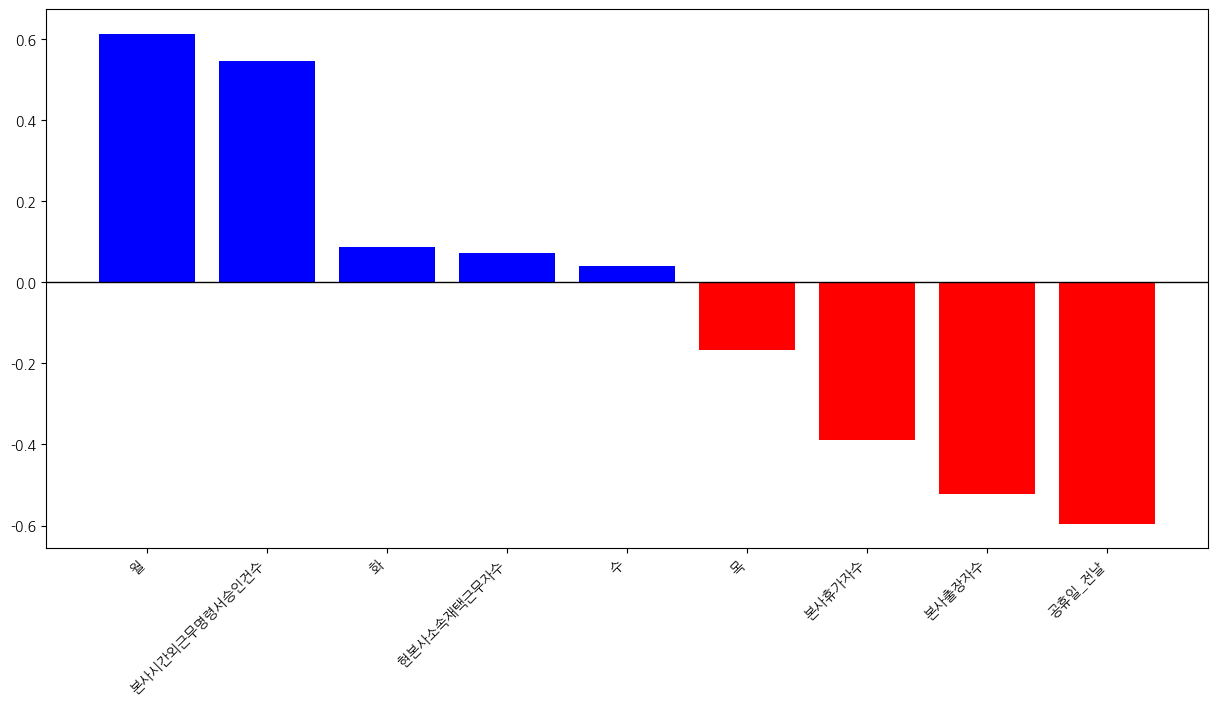

In [250]:
fig, ax = plt.subplots(figsize=(15, 7))

x = 상관계수['피처']
y = 상관계수['중식계']

color_map = ['red' if i < 0 else 'blue' for i in y]

ax.bar(x, y, color=color_map)
ax.axhline(0, c = 'k', lw = 1)

# x축 라벨 회전
plt.xticks(rotation=45, ha='right')

plt.show()

In [251]:
display(pd.DataFrame(corr_matrix['중식계'].sort_values(ascending=False)).head(6))
display(pd.DataFrame(corr_matrix['중식계'].sort_values(ascending=False)).tail(5))
상관계수_상위하위5_col

,중식계
중식계,1.000000
월,0.613115
본사시간외근무명령서승인건수,0.546884
화,0.087423
현본사소속재택근무자수,0.071471
수,0.040707


,중식계
수,0.040707
목,-0.166051
본사휴가자수,-0.389148
본사출장자수,-0.521949
공휴일_전날,-0.595935


['월',
 '본사시간외근무명령서승인건수',
 '화',
 '현본사소속재택근무자수',
 '수',
 '공휴일_전날',
 '본사출장자수',
 '본사휴가자수',
 '목',
 '수']

In [252]:
# cols = ['본사출장자수','본사시간외근무명령서승인건수','현본사소속재택근무자수','본사휴가자수']

# plt.figure(figsize = [10,10])

# for i,col in enumerate(cols):
    
#     plt.subplot(2,2,i+1)
    
#     sns.regplot(X[col], Y)
#     plt.title(col)

In [253]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures

In [254]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_중식계, y_중식계, test_size=0.2, random_state=42)

In [255]:
X_valid.head()

,본사출장자수,본사휴가자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,공휴일_전날,화,목,수,월
982,198,52,748,0,0,1,0,0,0
101,215,145,41,0,1,0,0,0,0
803,279,64,563,0,0,1,0,0,0
696,250,69,716,0,0,1,0,0,0
918,302,133,424,0,0,0,1,0,0


In [256]:
linear = LinearRegression()
ridge = Ridge(alpha = 0.5)
lasso = Lasso(alpha = 0.5)

linear.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)

linear_pred = linear.predict(X_valid)
linear_resid = y_valid - linear_pred

ridge_pred = ridge.predict(X_valid)
ridge_resid = y_valid - ridge_pred

lasso_pred = lasso.predict(X_valid)
lasso_resid = y_valid - lasso_pred

In [257]:
from sklearn.metrics import r2_score,mean_absolute_error
print('OLS')
print('Train set 에 대한 점수:', r2_score(y_train,linear.predict(X_train)))
print('valid set 에 대한 점수:', r2_score(y_valid,linear.predict(X_valid)))
print('--'*20)
print('RIDGE')
print('Train set 에 대한 점수:', r2_score(y_train,ridge.predict(X_train)))
print('valid set 에 대한 점수:', r2_score(y_valid,ridge.predict(X_valid)))
print('--'*20)
print('LASSO')
print('Train set 에 대한 점수:', r2_score(y_train,lasso.predict(X_train)))
print('valid set 에 대한 점수:', r2_score(y_valid,lasso.predict(X_valid)))

OLS
Train set 에 대한 점수: 0.7714877845436587
valid set 에 대한 점수: 0.7844627606362896
----------------------------------------
RIDGE
Train set 에 대한 점수: 0.7714856100143513
valid set 에 대한 점수: 0.7844793473971481
----------------------------------------
LASSO
Train set 에 대한 점수: 0.7711087413770591
valid set 에 대한 점수: 0.7858193175120793


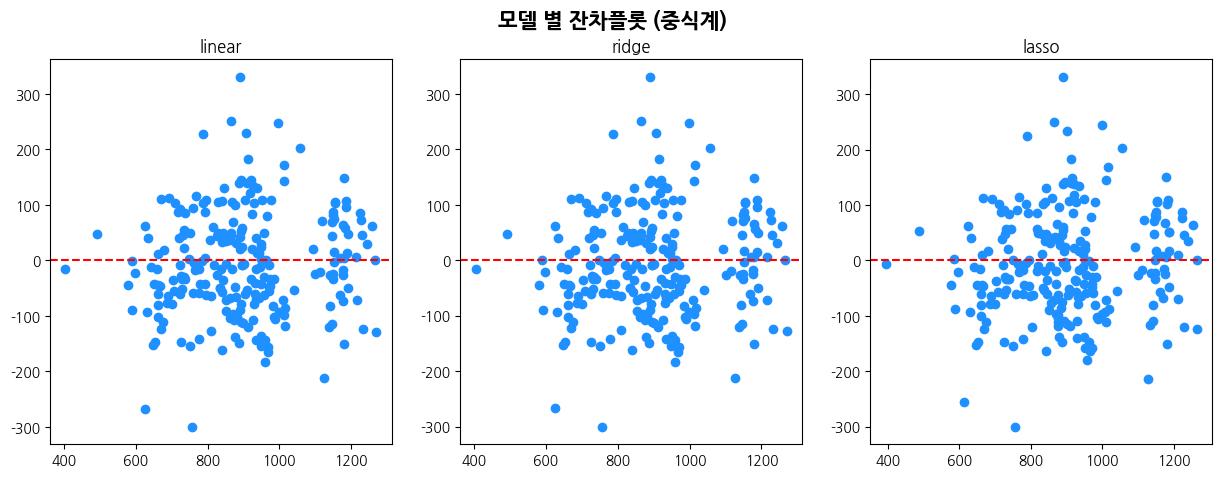

In [258]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(linear_pred, linear_resid,c = 'dodgerblue')
plt.axhline(y=0,c='r',ls = '--')
plt.title('linear')

plt.subplot(1,3,2)
plt.scatter(ridge_pred, ridge_resid, c = 'dodgerblue')
plt.axhline(y=0,c='r',ls = '--')
plt.title('ridge')

plt.subplot(1,3,3)
plt.scatter(lasso_pred, lasso_resid, c = 'dodgerblue')
plt.axhline(y=0,c='r',ls = '--')
plt.title('lasso')

plt.suptitle('모델 별 잔차플롯 (중식계)',weight = 'bold',fontsize = 15);

<AxesSubplot:xlabel='중식계', ylabel='Density'>

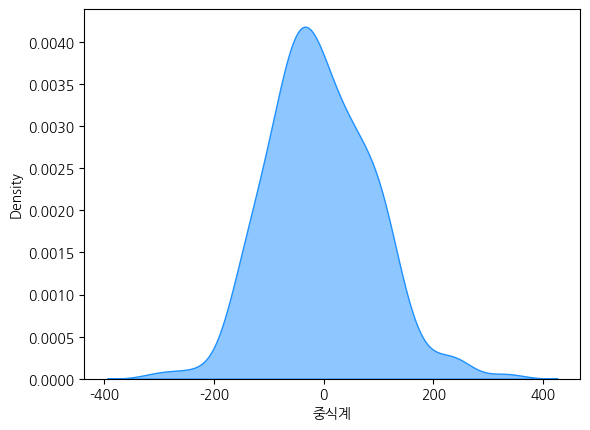

In [265]:
sns.kdeplot(lasso_resid, fill = True, alpha = 0.5, color = 'dodgerblue')
# sns.kdeplot(lasso_pred)

Text(0.5, 1.0, 'Lunch - QQ plot of Lasso')

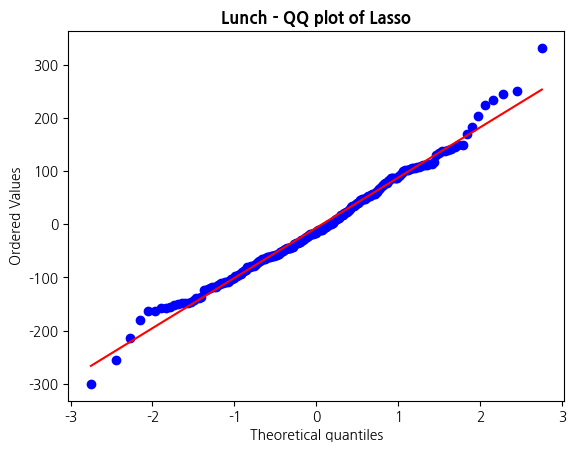

In [274]:
import scipy.stats as stats

stats.probplot(lasso_resid, plot=plt)
plt.title('Lunch - QQ plot of Lasso', weight = 'bold')

In [259]:
from sklearn.metrics import mean_absolute_error

# y_pred: 예측값, y_true: 실제값
mae = mean_absolute_error(y_valid, ridge.predict(X_valid))

print("MAE:", mae)

MAE: 75.56754126004846


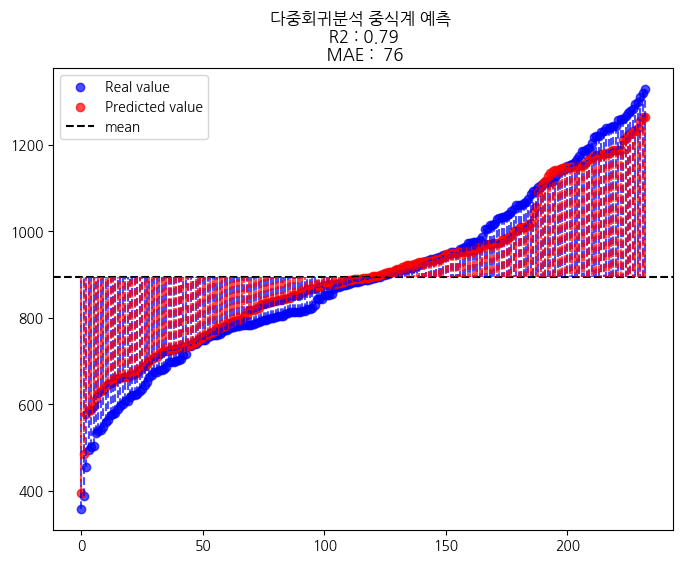

In [217]:
plt.subplots(figsize=(8, 6))

lasso_predicted = sorted(lasso.predict(X_valid))
m = np.mean(y_valid)
n = range(len(y_valid))
r2 = round(r2_score(y_valid,lasso.predict(X_valid)),2)

plt.scatter(n,sorted(y_valid),c = 'blue', alpha = 0.7, label = 'Real value')
plt.scatter(n,lasso_predicted, c = 'red', alpha = 0.7,label = 'Predicted value')
plt.axhline(m, c = 'k', ls = '--', label = 'mean')

SST = 0

for i in n:
    
    r = sorted(y_valid)[i]
    
    plt.plot([i,i],[r,m], color ='blue', alpha=0.7, ls='--', label='SST')
    
    SST += (r-m)**2
    
SSR = 0
    
for i in n:
    
    p = lasso_predicted[i]
    
    plt.plot([i,i],[p,m], color ='red', alpha=0.7, ls='--',label='SSR')

    SSR += (p-m)**2 

plt.legend(['Real value','Predicted value','mean'])
plt.title(f'다중회귀분석 중식계 예측 \n R2 : {r2} \n MAE : {mae : .0f}')
plt.show()

##### 회귀계수 구하기

In [182]:
회귀식 = [lasso.intercept_] + lasso.coef_.tolist()
열 = ['절편'] + X_train.columns.tolist()

회귀계수 = pd.DataFrame({'열' : 열,
        '회귀식':회귀식})

회귀계수 = 회귀계수.sort_values(by='회귀식', ascending=False)
display(회귀계수[회귀계수['회귀식']!=0])

,열,회귀식
0,절편,1351.263968
9,월,173.112069
8,수,69.198472
3,본사시간외근무명령서승인건수,0.214933
4,현본사소속재택근무자수,-0.181737
2,본사휴가자수,-0.564853
1,본사출장자수,-1.843385
6,화,-16.377611
5,공휴일_전날,-50.087743
7,목,-50.599504


In [183]:
# 회귀계수_요일관련 = 회귀계수.loc(['월', '화', '수', '목', '공휴일_전날'],'열')
회귀계수_요일관련 = 회귀계수[(회귀계수['열'] =='월')|(회귀계수['열'] =='화')|(회귀계수['열'] =='수')|(회귀계수['열'] =='목')|(회귀계수['열'] =='공휴일_전날')]
회귀계수_인원관련 = 회귀계수[회귀계수['열'].str.contains('수')]
# ['본사시간외근무명령서승인건수', '현본사소속재택근무자수', '본사휴가자수', '본사출장자수']
회귀계수_인원관련 = 회귀계수_인원관련[회귀계수_인원관련['열']!='수']
회귀계수_인원관련

,열,회귀식
3,본사시간외근무명령서승인건수,0.214933
4,현본사소속재택근무자수,-0.181737
2,본사휴가자수,-0.564853
1,본사출장자수,-1.843385


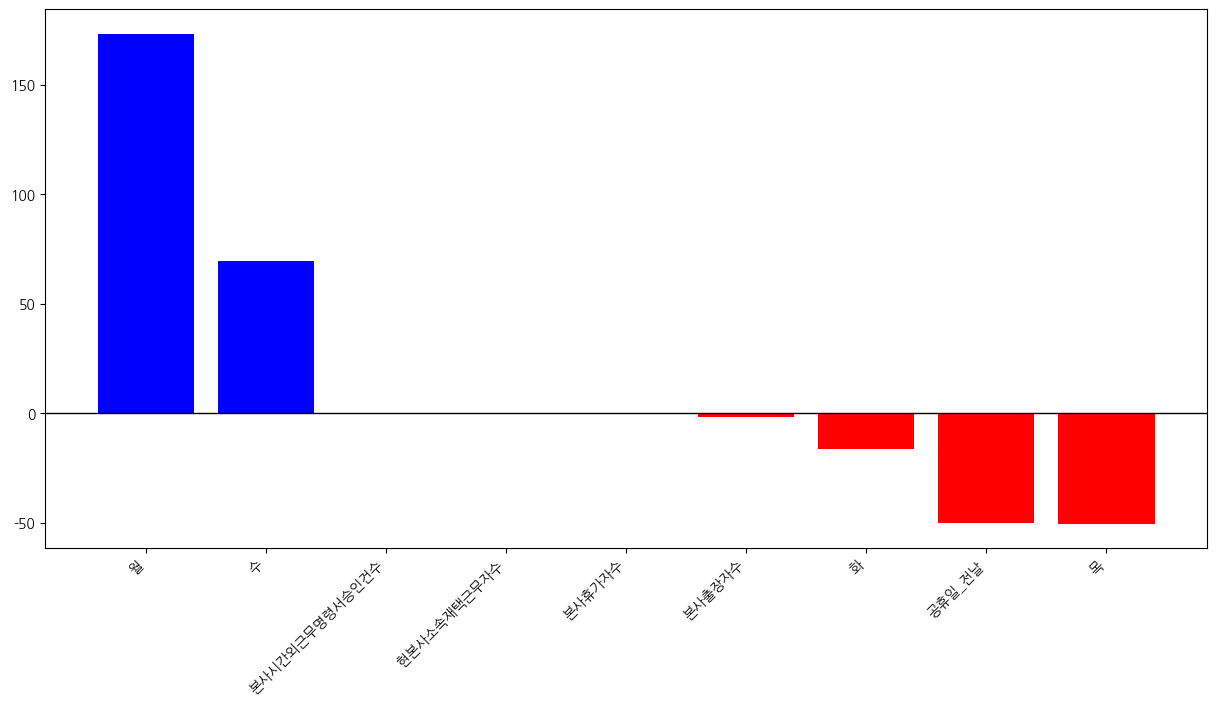

In [184]:
fig, ax = plt.subplots(figsize=(15, 7))

x = 회귀계수.drop(index=0)['열']
y = 회귀계수.drop(index=0)['회귀식']

color_map = ['red' if i < 0 else 'blue' for i in y]

ax.bar(x, y, color=color_map)
ax.axhline(0, c = 'k', lw = 1)

# x축 라벨 회전
plt.xticks(rotation=45, ha='right')

plt.show()

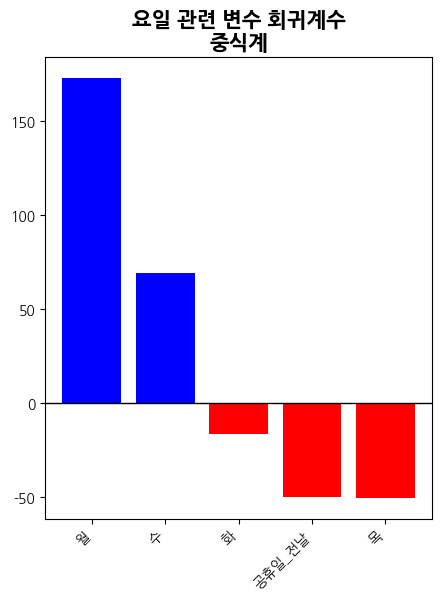

In [193]:
fig, ax = plt.subplots(figsize=(5, 6))

x = 회귀계수_요일관련['열']
y = 회귀계수_요일관련['회귀식']

color_map = ['red' if i < 0 else 'blue' for i in y]

ax.bar(x, y, color=color_map)
ax.axhline(0, c = 'k', lw = 1)

# x축 라벨 회전
plt.xticks(rotation=45, ha='right')
plt.title('요일 관련 변수 회귀계수\n중식계', fontsize = 15, weight = 'bold')

plt.show()

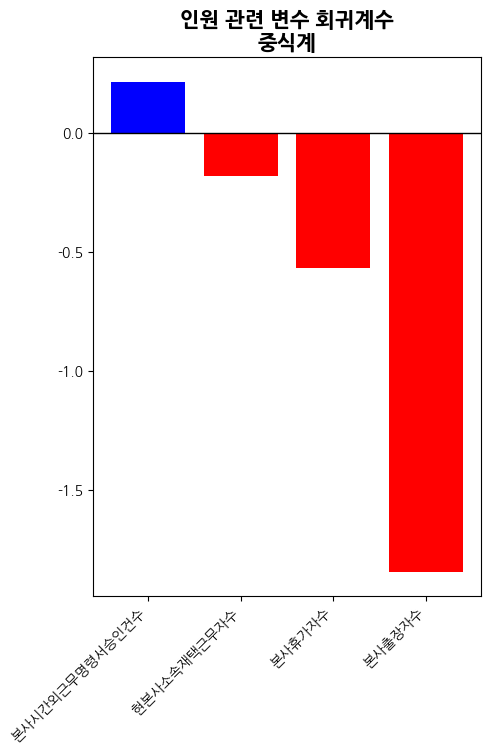

In [195]:
fig, ax = plt.subplots(figsize=(5, 7))

x = 회귀계수_인원관련['열']
y = 회귀계수_인원관련['회귀식']

color_map = ['red' if i < 0 else 'blue' for i in y]

ax.bar(x, y, color=color_map)
ax.axhline(0, c = 'k', lw = 1)

# x축 라벨 회전
plt.xticks(rotation=45, ha='right')
plt.title('인원 관련 변수 회귀계수\n중식계', fontsize = 15, weight = 'bold')

plt.show()

##### 변수선택 해보기

유전 알고리즘
* Features: Index(['중식_국_국밥', '중식_국_찌개', '화'], dtype='object')
* 변수의 상호작용이나 비선형성 등을 고려하지 않고 단순히 변수의 중요도만을 고려하는 경우에 적용
* 안 쓰는게 나은듯

In [187]:
# from genetic_selection import GeneticSelectionCV

# estimator = LinearRegression()
# model = GeneticSelectionCV(
#     estimator, cv=5, verbose=0,
#     scoring="accuracy", max_features=10,
#     n_population=100, crossover_proba=0.5,
#     mutation_proba=0.2, n_generations=50,
#     crossover_independent_proba=0.5,
#     mutation_independent_proba=0.04,
#     tournament_size=3, n_gen_no_change=10,
#     caching=True, n_jobs=-1)
# model = model.fit(X, y_중식계)
# print('Features:', X.columns[model.support_])

RFECV

In [188]:
# from sklearn.feature_selection import RFECV
# # from sklearn.model_selection import GridSearchCV
# # from sklearn.svm import SVR

# # Scikit-learn에서 사용할 estimator 선택
# estimator = LinearRegression()

# # RFECV 모델 객체 생성
# rfecv = RFECV(estimator=estimator, step=1, cv=5, scoring='neg_mean_squared_error')

# # feature selection 수행
# rfecv.fit(X, y_중식계)

# # 각 feature subset에 대한 cross-validation score 확인
# print("Optimal number of features : %d" % rfecv.n_features_)
# # print("features name:", rfecv.feature_names_in_)
# print("Selected Features: ", rfecv.support_)
# print("Ranking of features: ", rfecv.ranking_)
# print("Cross Validation Score: ", rfecv.grid_scores_)

상관계수 상위 하위 5개씩

In [189]:
# X_train, X_valid, y_train, y_valid = train_test_split(X[상관계수_상위하위5_col], y_중식계, test_size=0.2, random_state=42)

# linear = LinearRegression()
# ridge = Ridge(alpha = 0.5)
# lasso = Lasso(alpha = 0.5)

# linear.fit(X_train,y_train)
# ridge.fit(X_train,y_train)
# lasso.fit(X_train,y_train)

# linear_pred = linear.predict(X_valid)
# linear_resid = y_valid - linear_pred

# ridge_pred = ridge.predict(X_valid)
# ridge_resid = y_valid - ridge_pred

# lasso_pred = lasso.predict(X_valid)
# lasso_resid = y_valid - lasso_pred

# print('OLS')
# print('Train set 에 대한 점수:', r2_score(y_train,linear.predict(X_train)))
# print('valid set 에 대한 점수:', r2_score(y_valid,linear.predict(X_valid)))
# print('--'*20)
# print('RIDGE')
# print('Train set 에 대한 점수:', r2_score(y_train,ridge.predict(X_train)))
# print('valid set 에 대한 점수:', r2_score(y_valid,ridge.predict(X_valid)))
# print('--'*20)
# print('LASSO')
# print('Train set 에 대한 점수:', r2_score(y_train,lasso.predict(X_train)))
# print('valid set 에 대한 점수:', r2_score(y_valid,lasso.predict(X_valid)))

In [190]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,3,1)
# plt.scatter(linear_pred, linear_resid)
# plt.axhline(y=0,c='r')
# plt.title('linear')

# plt.subplot(1,3,2)
# plt.scatter(ridge_pred, ridge_resid)
# plt.axhline(y=0,c='r')
# plt.title('ridge')

# plt.subplot(1,3,3)
# plt.scatter(lasso_pred, lasso_resid)
# plt.axhline(y=0,c='r')
# plt.title('linear');

상관계수 상위 하위 4개씩

In [191]:
# 상관계수_상위하위4_col = list(corr_matrix['중식계'].sort_values(ascending=False)[:5].index) + list(corr_matrix['중식계'].sort_values()[:4].index)
# 상관계수_상위하위4_col.remove('중식계')

# X_train, X_valid, y_train, y_valid = train_test_split(X[상관계수_상위하위4_col], y_중식계, test_size=0.2, random_state=42)

# linear = LinearRegression()
# ridge = Ridge(alpha = 0.5)
# lasso = Lasso(alpha = 0.5)

# linear.fit(X_train,y_train)
# ridge.fit(X_train,y_train)
# lasso.fit(X_train,y_train)

# linear_pred = linear.predict(X_valid)
# linear_resid = y_valid - linear_pred

# ridge_pred = ridge.predict(X_valid)
# ridge_resid = y_valid - ridge_pred

# lasso_pred = lasso.predict(X_valid)
# lasso_resid = y_valid - lasso_pred

# print('변수 : ',상관계수_상위하위4_col)
# print('OLS')
# print('Train set 에 대한 점수:', r2_score(y_train,linear.predict(X_train)))
# print('valid set 에 대한 점수:', r2_score(y_valid,linear.predict(X_valid)))
# print('--'*20)
# print('RIDGE')
# print('Train set 에 대한 점수:', r2_score(y_train,ridge.predict(X_train)))
# print('valid set 에 대한 점수:', r2_score(y_valid,ridge.predict(X_valid)))
# print('--'*20)
# print('LASSO')
# print('Train set 에 대한 점수:', r2_score(y_train,lasso.predict(X_train)))
# print('valid set 에 대한 점수:', r2_score(y_valid,lasso.predict(X_valid)))

In [192]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,3,1)
# plt.scatter(linear_pred, linear_resid)
# plt.axhline(y=0,c='r')
# plt.title('linear')

# plt.subplot(1,3,2)
# plt.scatter(ridge_pred, ridge_resid)
# plt.axhline(y=0,c='r')
# plt.title('ridge')

# plt.subplot(1,3,3)
# plt.scatter(lasso_pred, lasso_resid)
# plt.axhline(y=0,c='r')
# plt.title('linear');

상관계수 상위 하위 3개씩

In [123]:
# 상관계수_상위하위3_col = list(corr_matrix['중식계'].sort_values(ascending=False)[:4].index) + list(corr_matrix['중식계'].sort_values()[:3].index)
# 상관계수_상위하위3_col.remove('중식계')

# X_train, X_valid, y_train, y_valid = train_test_split(X[상관계수_상위하위3_col], y_중식계, test_size=0.2, random_state=42)

# linear = LinearRegression()
# ridge = Ridge(alpha = 0.5)
# lasso = Lasso(alpha = 0.5)

# linear.fit(X_train,y_train)
# ridge.fit(X_train,y_train)
# lasso.fit(X_train,y_train)

# linear_pred = linear.predict(X_valid)
# linear_resid = y_valid - linear_pred

# ridge_pred = ridge.predict(X_valid)
# ridge_resid = y_valid - ridge_pred

# lasso_pred = lasso.predict(X_valid)
# lasso_resid = y_valid - lasso_pred

# print('변수 : ', 상관계수_상위하위3_col)
# print('OLS')
# print('Train set 에 대한 점수:', r2_score(y_train,linear.predict(X_train)))
# print('valid set 에 대한 점수:', r2_score(y_valid,linear.predict(X_valid)))
# print('--'*20)
# print('RIDGE')
# print('Train set 에 대한 점수:', r2_score(y_train,ridge.predict(X_train)))
# print('valid set 에 대한 점수:', r2_score(y_valid,ridge.predict(X_valid)))
# print('--'*20)
# print('LASSO')
# print('Train set 에 대한 점수:', r2_score(y_train,lasso.predict(X_train)))
# print('valid set 에 대한 점수:', r2_score(y_valid,lasso.predict(X_valid)))

In [124]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,3,1)
# plt.scatter(linear_pred, linear_resid)
# plt.axhline(y=0,c='r')
# plt.title('linear')

# plt.subplot(1,3,2)
# plt.scatter(ridge_pred, ridge_resid)
# plt.axhline(y=0,c='r')
# plt.title('ridge')

# plt.subplot(1,3,3)
# plt.scatter(lasso_pred, lasso_resid)
# plt.axhline(y=0,c='r')
# plt.title('linear');

#### 석식계

In [233]:
X_석식계.columns

Index(['본사출장자수', '본사휴가자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '공휴일_전날',
       '석식_밥_김밥', '석식_밥_덮밥', '석식_밥_면', '석식_밥_밥', '석식_밥_볶음밥', '석식_밥_비빔밥',
       '석식_밥_주먹밥', '석식_밥_카레', '석식_밥_특식', '석식_국_감자탕', '석식_국_고기-맑은국물',
       '석식_국_고기-빨간국물', '석식_국_국밥', '석식_국_기타국', '석식_국_된장국물', '석식_국_떡국',
       '석식_국_만두국', '석식_국_면', '석식_국_미역국', '석식_국_삼계탕', '석식_국_생선-맑은국물',
       '석식_국_생선-빨간국물', '석식_국_스프', '석식_국_어묵탕', '석식_국_없음', '석식_국_찌개', '석식_메인_기타',
       '석식_메인_닭', '석식_메인_돼지', '석식_메인_면', '석식_메인_생선', '석식_메인_생선외해산물', '석식_메인_소',
       '석식_메인_채소', '석식_메인_피자', '목', '수', '월', '화'],
      dtype='object')

##### 상관계수 구하기

In [234]:
corr_matrix = pd.concat([X_석식계,y_석식계], axis = 1).corr()
corr_matrix['석식계']

본사출장자수           -0.194714
본사휴가자수           -0.441422
본사시간외근무명령서승인건수    0.577825
현본사소속재택근무자수      -0.120799
공휴일_전날           -0.391623
석식_밥_김밥           0.117597
석식_밥_덮밥           0.131546
석식_밥_면            0.057996
석식_밥_밥           -0.210317
석식_밥_볶음밥          0.082813
석식_밥_비빔밥          0.022773
석식_밥_주먹밥          0.015537
석식_밥_카레          -0.030053
석식_밥_특식           0.002342
석식_국_감자탕         -0.075213
석식_국_고기-맑은국물     -0.090731
석식_국_고기-빨간국물     -0.082155
석식_국_국밥          -0.009016
석식_국_기타국          0.005501
석식_국_된장국물        -0.009795
석식_국_떡국          -0.041194
석식_국_만두국          0.005231
석식_국_면            0.112723
석식_국_미역국          0.030449
석식_국_삼계탕          0.038912
석식_국_생선-맑은국물      0.004211
석식_국_생선-빨간국물      0.007109
석식_국_스프           0.062637
석식_국_어묵탕          0.025995
석식_국_없음          -0.030737
석식_국_찌개          -0.023427
석식_메인_기타          0.027928
석식_메인_닭           0.010139
석식_메인_돼지         -0.025977
석식_메인_면           0.044914
석식_메인_생선         -0.044293
석식_메인_생선외해산물      0.015936
석

In [235]:
corr_matrix = pd.concat([X_석식계,y_석식계], axis = 1).corr()
# sns.heatmap(corr_matrix, annot=True, linewidth=1, cmap='coolwarm');
상관계수 = pd.DataFrame(corr_matrix['석식계'].sort_values(ascending=False)).drop(index='석식계')
상관계수['피처'] = 상관계수.index

display(pd.DataFrame(corr_matrix['석식계'].sort_values(ascending=False)))
# display(pd.DataFrame(corr_matrix['석식계'].sort_values(ascending=False)).head(5))

,석식계
석식계,1.000000
본사시간외근무명령서승인건수,0.577825
월,0.280936
화,0.203122
석식_밥_덮밥,0.131546
석식_밥_김밥,0.117597
석식_국_면,0.112723
석식_밥_볶음밥,0.082813
석식_국_스프,0.062637
석식_밥_면,0.057996


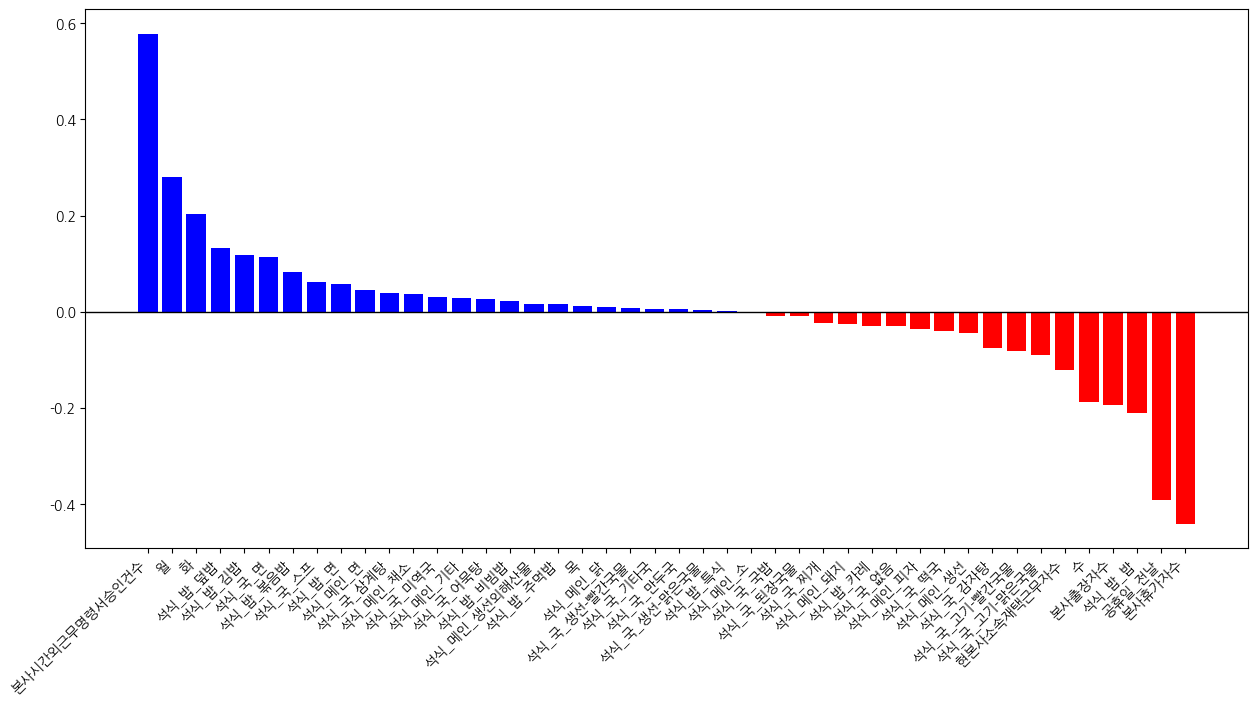

In [236]:
fig, ax = plt.subplots(figsize=(15, 7))

x = 상관계수['피처']
y = 상관계수['석식계']

color_map = ['red' if i < 0 else 'blue' for i in y]

ax.bar(x, y, color=color_map)
ax.axhline(0, c = 'k', lw = 1)

# x축 라벨 회전
plt.xticks(rotation=45, ha='right')

plt.show()

In [237]:
X_train, X_valid, y_train, y_valid = train_test_split(X_석식계, y_석식계, test_size=0.2, random_state=77)

In [238]:
linear = LinearRegression()
ridge = Ridge(alpha = 1)
lasso = Lasso(alpha = 1)

linear.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)

linear_pred = linear.predict(X_valid)
linear_resid = y_valid - linear_pred

ridge_pred = ridge.predict(X_valid)
ridge_resid = y_valid - ridge_pred

lasso_pred = lasso.predict(X_valid)
lasso_resid = y_valid - lasso_pred

In [239]:
from sklearn.metrics import r2_score,mean_absolute_error
print('OLS')
print('Train set 에 대한 점수:', r2_score(y_train,linear.predict(X_train)))
print('valid set 에 대한 점수:', r2_score(y_valid,linear.predict(X_valid)))
print('--'*20)
print('RIDGE')
print('Train set 에 대한 점수:', r2_score(y_train,ridge.predict(X_train)))
print('valid set 에 대한 점수:', r2_score(y_valid,ridge.predict(X_valid)))
print('--'*20)
print('LASSO')
print('Train set 에 대한 점수:', r2_score(y_train,lasso.predict(X_train)))
print('valid set 에 대한 점수:', r2_score(y_valid,lasso.predict(X_valid)))

OLS
Train set 에 대한 점수: 0.5589640369795926
valid set 에 대한 점수: 0.5356744891670189
----------------------------------------
RIDGE
Train set 에 대한 점수: 0.5566891096024189
valid set 에 대한 점수: 0.5493485549422319
----------------------------------------
LASSO
Train set 에 대한 점수: 0.5188596101999399
valid set 에 대한 점수: 0.5438369604534277


<module 'matplotlib.pyplot' from 'C:\\Users\\juku\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

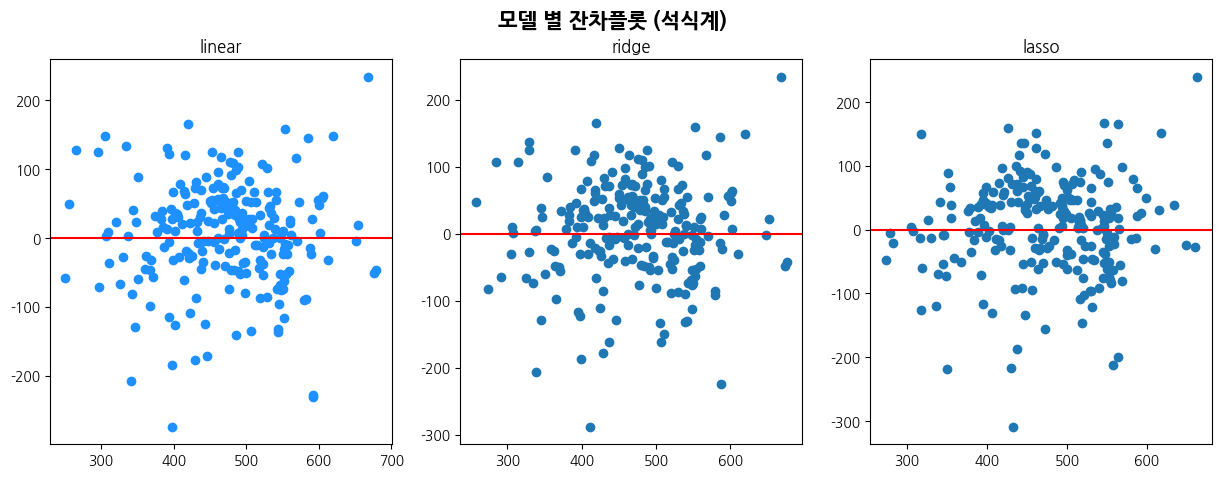

In [243]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(linear_pred, linear_resid, c = 'dodgerblue')
plt.axhline(y=0,c='r')
plt.title('linear')

plt.subplot(1,3,2)
plt.scatter(ridge_pred, ridge_resid, c = 'dodgerblue')
plt.axhline(y=0,c='r')
plt.title('ridge')

plt.subplot(1,3,3)
plt.scatter(lasso_pred, lasso_resid,c = 'dodgerblue')
plt.axhline(y=0,c='r')
plt.title('lasso')

plt.suptitle('모델 별 잔차플롯 (석식계)',weight = 'bold',fontsize = 15);
plt

In [241]:
from sklearn.metrics import mean_absolute_error

# y_pred: 예측값, y_true: 실제값
mae = mean_absolute_error(y_valid, ridge.predict(X_valid))

print("MAE:", mae)

MAE: 56.24829721586643


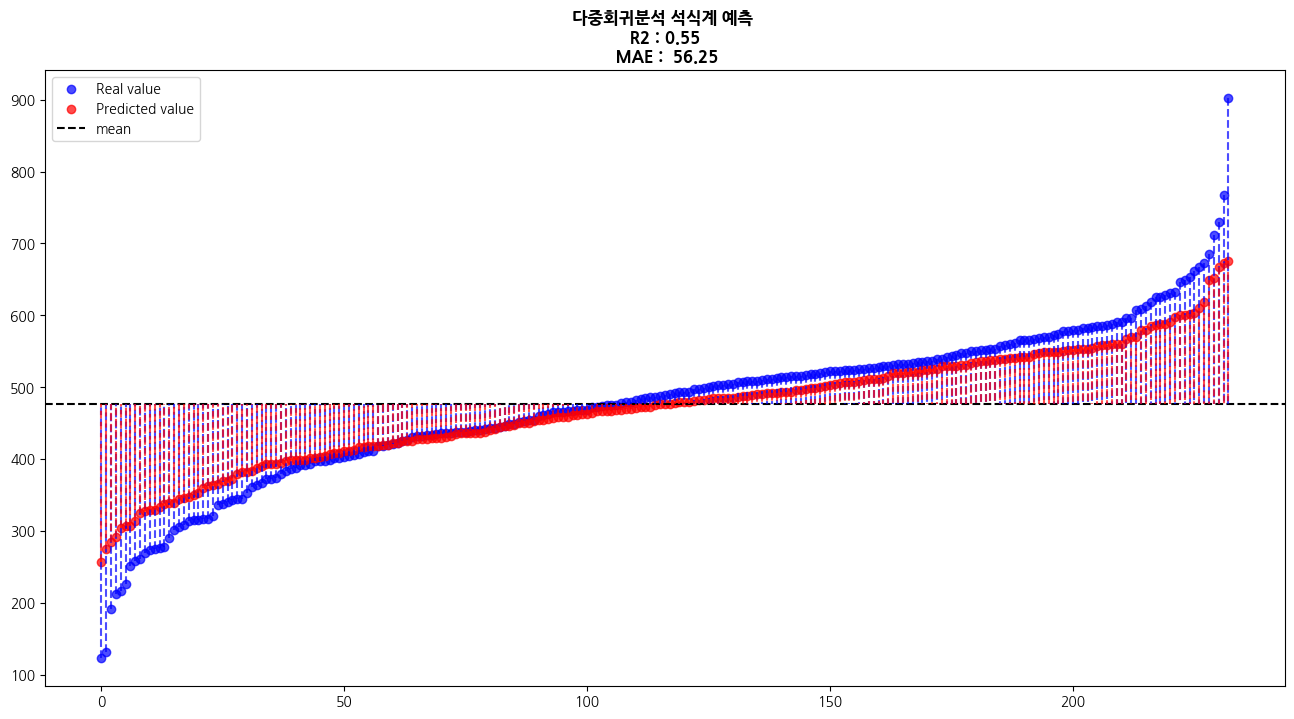

In [134]:
plt.subplots(figsize=(16, 8))

ridge_predicted = sorted(ridge.predict(X_valid))
m = np.mean(y_valid)
n = range(len(y_valid))
r2 = round(r2_score(y_valid, ridge.predict(X_valid)), 2)

plt.scatter(n, sorted(y_valid), c='blue', alpha=0.7, label='Real value')
plt.scatter(n, ridge_predicted, c='red', alpha=0.7, label='Predicted value')
plt.axhline(m, c='k', ls='--', label='mean')

SST = 0

for i in n:

    r = sorted(y_valid)[i]

    plt.plot([i, i], [r, m], color='blue', alpha=0.7, ls='--', label='SST')

    SST += (r-m)**2

SSR = 0

for i in n:

    p = ridge_predicted[i]

    plt.plot([i, i], [p, m], color='red', alpha=0.7, ls='--', label='SSR')

    SSR += (p-m)**2

plt.legend(['Real value', 'Predicted value', 'mean'])
plt.title(f'다중회귀분석 석식계 예측 \n R2 : {r2} \n MAE : {mae : .2f}',
          weight='bold')
plt.show()

##### 회귀계수 구하기

In [135]:
회귀식 = [lasso.intercept_] + lasso.coef_.tolist()
열 = ['절편'] + X_train.columns.tolist()

회귀계수 = pd.DataFrame({'열' : 열,
        '회귀식':회귀식})

회귀계수 = 회귀계수.sort_values(by='회귀식', ascending=False)
회귀계수

,열,회귀식
0,절편,655.017234
5,공휴일_전날,20.070935
34,석식_메인_돼지,4.584413
3,본사시간외근무명령서승인건수,0.218539
33,석식_메인_닭,0.000000
25,석식_국_삼계탕,0.000000
26,석식_국_생선-맑은국물,0.000000
27,석식_국_생선-빨간국물,0.000000
28,석식_국_스프,0.000000
29,석식_국_어묵탕,0.000000


In [136]:
# 회귀계수_요일관련 = 회귀계수.loc(['월', '화', '수', '목', '공휴일_전날'],'열')
회귀계수_요일관련 = 회귀계수[(회귀계수['열'] =='월')|(회귀계수['열'] =='화')|(회귀계수['열'] =='수')|(회귀계수['열'] =='목')|(회귀계수['열'] =='공휴일_전날')]
회귀계수_인원관련 = 회귀계수[회귀계수['열'].str.contains('수')]
# ['본사시간외근무명령서승인건수', '현본사소속재택근무자수', '본사휴가자수', '본사출장자수']
회귀계수_인원관련 = 회귀계수_인원관련[회귀계수_인원관련['열']!='수']
회귀계수_인원관련

,열,회귀식
3,본사시간외근무명령서승인건수,0.218539
4,현본사소속재택근무자수,-0.249259
2,본사휴가자수,-0.315468
1,본사출장자수,-0.697783


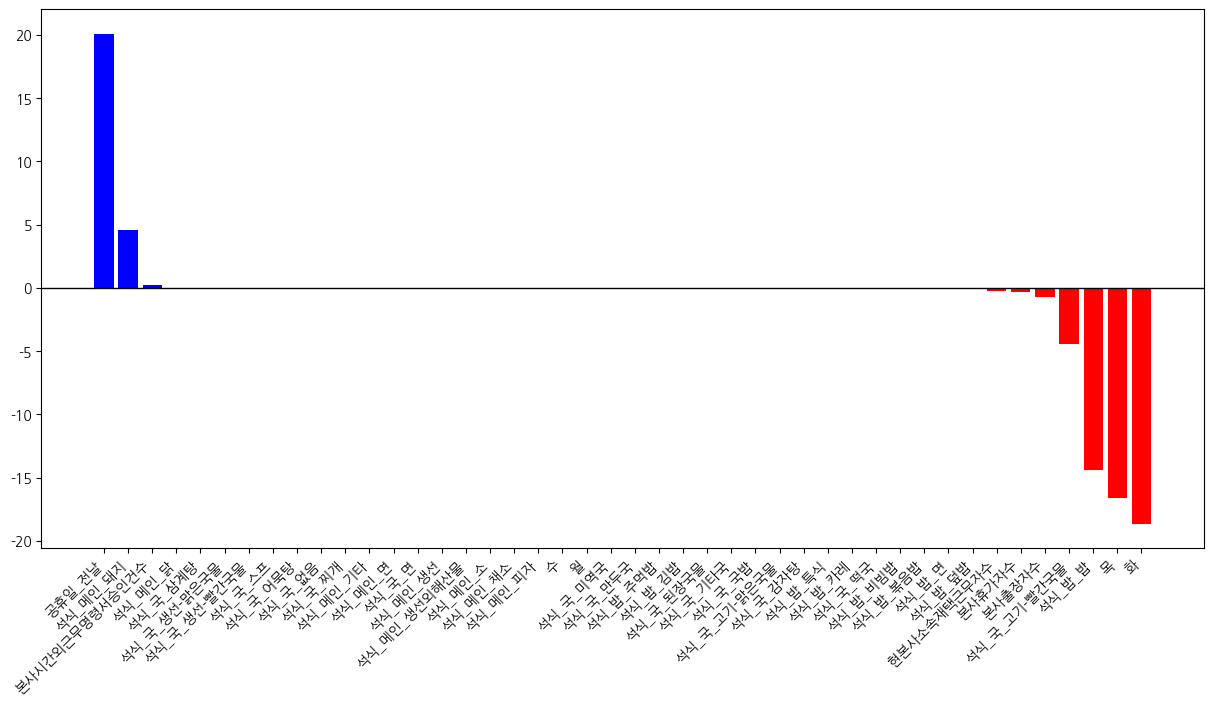

In [137]:
fig, ax = plt.subplots(figsize=(15, 7))

x = 회귀계수.drop(index=0)['열']
y = 회귀계수.drop(index=0)['회귀식']

color_map = ['red' if i < 0 else 'blue' for i in y]

ax.bar(x, y, color=color_map)
ax.axhline(0, c = 'k', lw = 1)

# x축 라벨 회전
plt.xticks(rotation=45, ha='right')

plt.show()

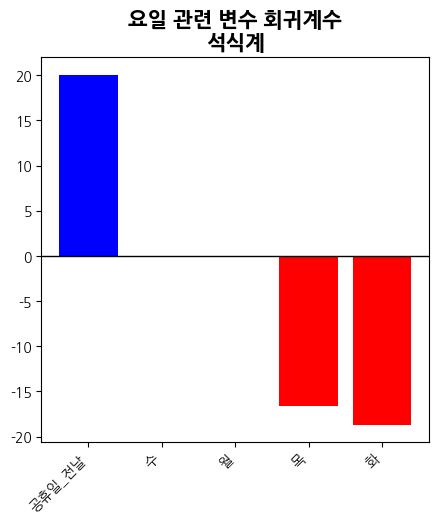

In [138]:
fig, ax = plt.subplots(figsize=(5, 5))

x = 회귀계수_요일관련['열']
y = 회귀계수_요일관련['회귀식']

color_map = ['red' if i < 0 else 'blue' for i in y]

ax.bar(x, y, color=color_map)
ax.axhline(0, c = 'k', lw = 1)

# x축 라벨 회전
plt.xticks(rotation=45, ha='right')
plt.title('요일 관련 변수 회귀계수\n석식계', fontsize = 15, weight = 'bold')

plt.show()

In [139]:
회귀계수_요일관련

,열,회귀식
5,공휴일_전날,20.070935
42,수,-0.000000
43,월,-0.000000
41,목,-16.653770
44,화,-18.662980


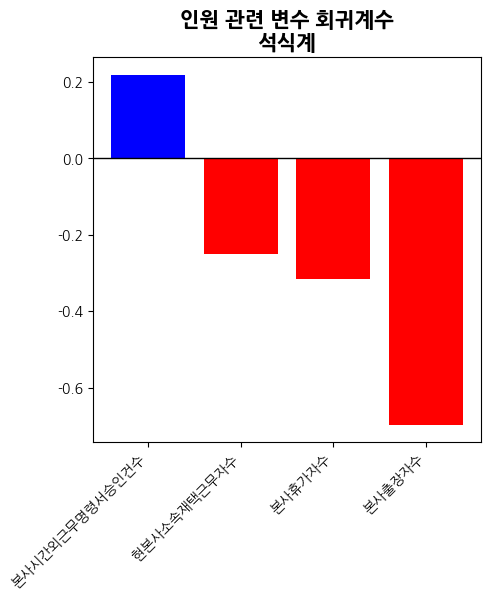

In [140]:
fig, ax = plt.subplots(figsize=(5, 5))

x = 회귀계수_인원관련['열']
y = 회귀계수_인원관련['회귀식']

color_map = ['red' if i < 0 else 'blue' for i in y]

ax.bar(x, y, color=color_map)
ax.axhline(0, c = 'k', lw = 1)

# x축 라벨 회전
plt.xticks(rotation=45, ha='right')
plt.title('인원 관련 변수 회귀계수\n석식계', fontsize = 15, weight = 'bold')

plt.show()

Text(0.5, 1.0, '평일 Vs 공휴일 전날\n석식계')

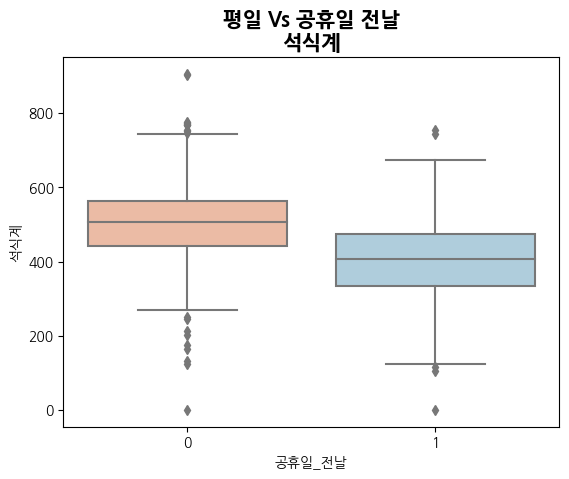

In [141]:
sns.boxplot(data = pd.concat([X_석식계, y_석식계], axis=1), x = '공휴일_전날', y = '석식계' , palette = "RdBu" )
plt.title('평일 Vs 공휴일 전날\n석식계', fontsize = 15, weight = 'bold')